In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_ppdc_donchi_strategy import (
    TSMyoPPDCDONCHIStrategy
)
from vnpy.app.cta_strategy.strategies.tsmyo_thepivot_strategy import (
    TSMyoThePivotStrategy
)
from datetime import datetime

In [5]:
# PPDC 股指IF
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoPPDCDONCHIStrategy, {"trailing_stop":0.6, "fixed_size":1,"limited_size":8,"atr_stop":4,"atr_window":35,"don_len":10})

2020-08-09 12:56:06.672612	开始加载历史数据
2020-08-09 12:56:06.935874	加载进度： [2%]
2020-08-09 12:56:07.145706	加载进度： [4%]
2020-08-09 12:56:07.478442	加载进度： [6%]
2020-08-09 12:56:07.756437	加载进度： [8%]
2020-08-09 12:56:08.064684	加载进度：# [10%]
2020-08-09 12:56:08.330525	加载进度：# [12%]
2020-08-09 12:56:08.624442	加载进度：# [14%]
2020-08-09 12:56:08.969339	加载进度：# [16%]
2020-08-09 12:56:09.229253	加载进度：# [18%]
2020-08-09 12:56:09.460588	加载进度：## [21%]
2020-08-09 12:56:09.828492	加载进度：## [23%]
2020-08-09 12:56:10.091692	加载进度：## [25%]
2020-08-09 12:56:10.357413	加载进度：## [27%]
2020-08-09 12:56:10.673134	加载进度：## [29%]
2020-08-09 12:56:10.958526	加载进度：### [31%]
2020-08-09 12:56:11.207528	加载进度：### [33%]
2020-08-09 12:56:11.474723	加载进度：### [35%]
2020-08-09 12:56:11.848113	加载进度：### [37%]
2020-08-09 12:56:12.118530	加载进度：### [39%]
2020-08-09 12:56:12.407101	加载进度：#### [41%]
2020-08-09 12:56:12.816520	加载进度：#### [43%]
2020-08-09 12:56:13.033316	加载进度：#### [45%]
2020-08-09 12:56:13.322162	加载进度：#### [47%]
2020-08-09 12:56:13.62125

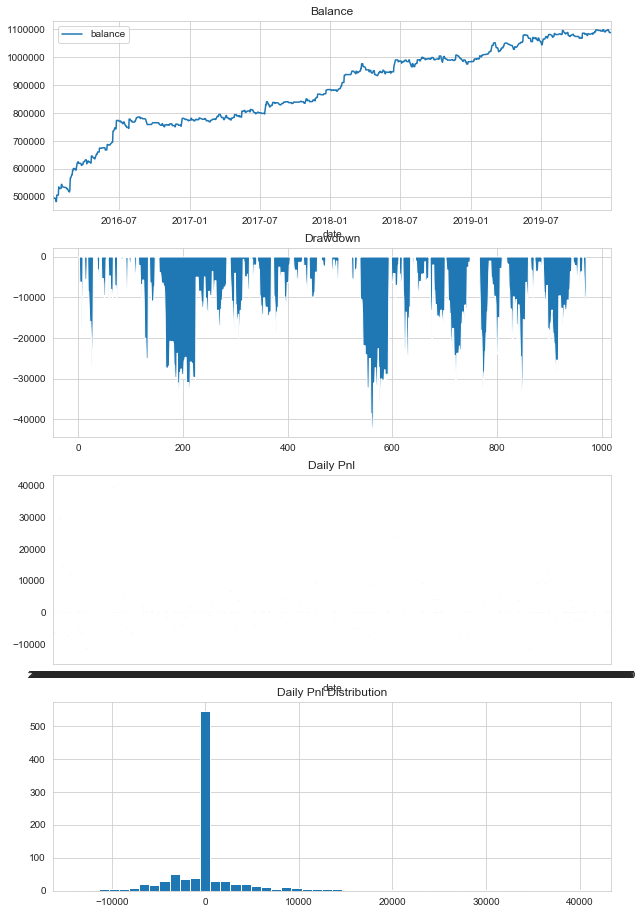

In [7]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [8]:
# 12-19 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
#setting.add_parameter("atr_stop", 3, 6, 1)
#setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("atr_ma_len", 16, 32, 4)
#setting.add_parameter("limited_size", 4, 8, 4)
setting.add_parameter("donchian_len", 5, 20, 1)

engine.run_optimization(setting)

2020-02-15 19:54:46.371550	参数：{'donchian_len': 9}, 目标：1.6927666877136647
2020-02-15 19:54:46.371550	参数：{'donchian_len': 6}, 目标：1.6775403298123754
2020-02-15 19:54:46.371550	参数：{'donchian_len': 8}, 目标：1.6594778049035035
2020-02-15 19:54:46.372552	参数：{'donchian_len': 7}, 目标：1.6423942920444552
2020-02-15 19:54:46.372552	参数：{'donchian_len': 5}, 目标：1.6327897583309947
2020-02-15 19:54:46.372552	参数：{'donchian_len': 10}, 目标：1.5945657279647671
2020-02-15 19:54:46.372552	参数：{'donchian_len': 13}, 目标：1.566551246995478
2020-02-15 19:54:46.372552	参数：{'donchian_len': 15}, 目标：1.5461705536676236
2020-02-15 19:54:46.372552	参数：{'donchian_len': 14}, 目标：1.5424779817557068
2020-02-15 19:54:46.372552	参数：{'donchian_len': 11}, 目标：1.5417715409219253
2020-02-15 19:54:46.372552	参数：{'donchian_len': 12}, 目标：1.526563569454042
2020-02-15 19:54:46.372552	参数：{'donchian_len': 16}, 目标：1.5214814821895652
2020-02-15 19:54:46.372552	参数：{'donchian_len': 17}, 目标：1.4739690843997149
2020-02-15 19:54:46.372552	参数：{'donchian_len'

[("{'donchian_len': 9}",
  1.6927666877136647,
  {'start_date': datetime.date(2012, 1, 11),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 1696,
   'profit_days': 303,
   'loss_days': 365,
   'capital': 1000000,
   'end_balance': 1765023.879399993,
   'max_drawdown': -55573.93800000055,
   'max_ddpercent': -3.340146726177685,
   'max_drawdown_duration': 205,
   'total_net_pnl': 765023.8793999928,
   'daily_net_pnl': 451.07540058961837,
   'total_commission': 59796.120599999995,
   'daily_commission': 35.257146580188675,
   'total_slippage': 129360.0,
   'daily_slippage': 76.27358490566037,
   'total_turnover': 1993204020.0,
   'daily_turnover': 1175238.2193396227,
   'total_trade_count': 2156,
   'daily_trade_count': 1.2712264150943395,
   'total_return': 76.50238793999931,
   'annual_return': 10.825809614150845,
   'daily_return': 0.0335002488029973,
   'return_std': 0.3065889863016026,
   'sharpe_ratio': 1.6927666877136647,
   'return_drawdown_ratio': 22.90390040067049}

2020-08-09 13:04:49.724229	开始加载历史数据
2020-08-09 13:04:49.991252	加载进度： [2%]
2020-08-09 13:04:50.190627	加载进度： [4%]
2020-08-09 13:04:50.539057	加载进度： [6%]
2020-08-09 13:04:50.821313	加载进度： [8%]
2020-08-09 13:04:51.138732	加载进度：# [10%]
2020-08-09 13:04:51.405975	加载进度：# [12%]
2020-08-09 13:04:51.702245	加载进度：# [14%]
2020-08-09 13:04:52.037891	加载进度：# [16%]
2020-08-09 13:04:52.301503	加载进度：# [18%]
2020-08-09 13:04:52.530401	加载进度：## [21%]
2020-08-09 13:04:52.898924	加载进度：## [23%]
2020-08-09 13:04:53.159952	加载进度：## [25%]
2020-08-09 13:04:53.442406	加载进度：## [27%]
2020-08-09 13:04:53.763222	加载进度：## [29%]
2020-08-09 13:04:54.043377	加载进度：### [31%]
2020-08-09 13:04:54.293674	加载进度：### [33%]
2020-08-09 13:04:54.570488	加载进度：### [35%]
2020-08-09 13:04:54.937852	加载进度：### [37%]
2020-08-09 13:04:55.202123	加载进度：### [39%]
2020-08-09 13:04:55.476774	加载进度：#### [41%]
2020-08-09 13:04:55.885217	加载进度：#### [43%]
2020-08-09 13:04:56.103399	加载进度：#### [45%]
2020-08-09 13:04:56.376737	加载进度：#### [47%]
2020-08-09 13:04:56.66053

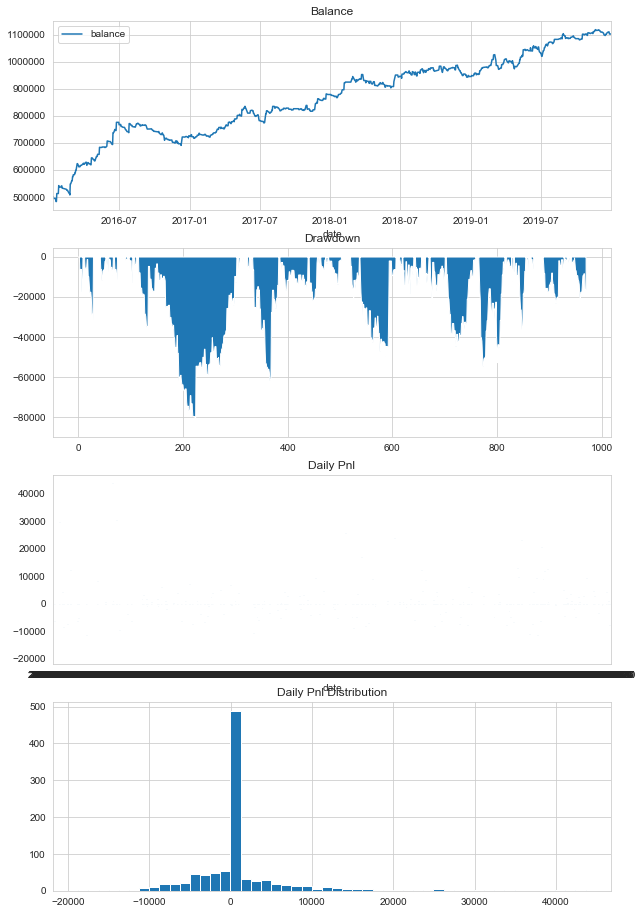

In [2]:
# PPDC 股指IF
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoThePivotStrategy, {"trailing_stop":0.6, "fixed_size":1,"limited_size":8,"atr_stop":4,"atr_window":35,"don_len":10})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2020-02-16 13:32:29.866415	开始加载历史数据
2020-02-16 13:32:29.866415	加载进度： [1%]
2020-02-16 13:32:29.866415	加载进度： [2%]
2020-02-16 13:32:29.866415	加载进度： [3%]
2020-02-16 13:32:29.866415	加载进度： [4%]
2020-02-16 13:32:29.866415	加载进度： [5%]
2020-02-16 13:32:29.866415	加载进度： [6%]
2020-02-16 13:32:29.866415	加载进度： [7%]
2020-02-16 13:32:29.866415	加载进度： [8%]
2020-02-16 13:32:29.867416	加载进度： [9%]
2020-02-16 13:32:29.867416	加载进度：# [10%]
2020-02-16 13:32:29.867416	加载进度：# [11%]
2020-02-16 13:32:29.867416	加载进度：# [12%]
2020-02-16 13:32:29.867416	加载进度：# [13%]
2020-02-16 13:32:29.867416	加载进度：# [14%]
2020-02-16 13:32:29.867416	加载进度：# [15%]
2020-02-16 13:32:29.867416	加载进度：# [16%]
2020-02-16 13:32:29.867416	加载进度：# [17%]
2020-02-16 13:32:29.867416	加载进度：# [18%]
2020-02-16 13:32:29.867416	加载进度：# [20%]
2020-02-16 13:32:29.867416	加载进度：## [21%]
2020-02-16 13:32:29.867416	加载进度：## [22%]
2020-02-16 13:32:29.867416	加载进度：## [23%]
2020-02-16 13:32:29.867416	加载进度：## [24%]
2020-02-16 13:32:29.867416	加载进度：## [25%]
2020-02-16 13:32:

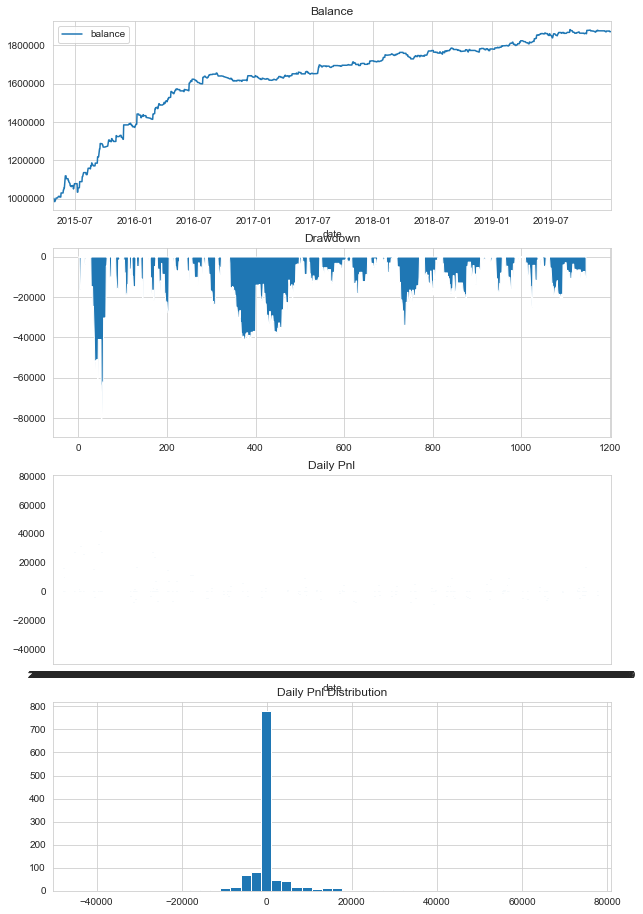

In [15]:
#%%
#%%
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2012, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=1_000_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoPPDCStrategy,{'limited_size': 4, 'donchian_len': 5})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [16]:
# 15-20 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
#setting.add_parameter("atr_stop", 3, 6, 1)
#setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("atr_ma_len", 16, 32, 4)
setting.add_parameter("limited_size", 4, 8, 4)
setting.add_parameter("donchian_len", 5, 30, 5)

engine2.run_optimization(setting)

2020-02-16 13:34:23.267960	参数：{'limited_size': 4, 'donchian_len': 5}, 目标：1.7460202838755945
2020-02-16 13:34:23.267960	参数：{'limited_size': 8, 'donchian_len': 5}, 目标：1.7453815620546584
2020-02-16 13:34:23.267960	参数：{'limited_size': 4, 'donchian_len': 10}, 目标：1.7000070801516038
2020-02-16 13:34:23.267960	参数：{'limited_size': 4, 'donchian_len': 15}, 目标：1.670238864628577
2020-02-16 13:34:23.268961	参数：{'limited_size': 8, 'donchian_len': 10}, 目标：1.6384870145663664
2020-02-16 13:34:23.268961	参数：{'limited_size': 4, 'donchian_len': 20}, 目标：1.622365930095103
2020-02-16 13:34:23.268961	参数：{'limited_size': 4, 'donchian_len': 30}, 目标：1.58788551077177
2020-02-16 13:34:23.268961	参数：{'limited_size': 8, 'donchian_len': 15}, 目标：1.5681086342857522
2020-02-16 13:34:23.268961	参数：{'limited_size': 4, 'donchian_len': 25}, 目标：1.5585724385968833
2020-02-16 13:34:23.268961	参数：{'limited_size': 8, 'donchian_len': 20}, 目标：1.5203611707550344
2020-02-16 13:34:23.268961	参数：{'limited_size': 8, 'donchian_len': 25}, 目标：1.

[("{'limited_size': 4, 'donchian_len': 5}",
  1.7460202838755945,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2019, 12, 31),
   'total_days': 1146,
   'profit_days': 203,
   'loss_days': 221,
   'capital': 1000000,
   'end_balance': 1871721.9004000025,
   'max_drawdown': -85194.66679999884,
   'max_ddpercent': -7.612458819050199,
   'max_drawdown_duration': 37,
   'total_net_pnl': 871721.9004000024,
   'daily_net_pnl': 760.6648345549759,
   'total_commission': 43998.0996,
   'daily_commission': 38.39275706806283,
   'total_slippage': 48880.0,
   'daily_slippage': 42.652705061082024,
   'total_turnover': 1466603320.0,
   'daily_turnover': 1279758.5689354276,
   'total_trade_count': 1222,
   'daily_trade_count': 1.0663176265270506,
   'total_return': 87.17219004000026,
   'annual_return': 18.255956029319425,
   'daily_return': 0.05469972160043732,
   'return_std': 0.48533482172483267,
   'sharpe_ratio': 1.7460202838755945,
   'return_drawdown_ratio': 11.4512

In [18]:
# 17-19 样本优化
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=1_000_000,
)
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
#setting.add_parameter("atr_stop", 3, 6, 1)
#setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("atr_ma_len", 16, 32, 4)
setting.add_parameter("limited_size", 4, 8, 4)
setting.add_parameter("donchian_len", 5, 30, 5)

engine2.run_optimization(setting)

2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 5}, 目标：1.7235620326808476
2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 30}, 目标：1.6437130663492034
2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 25}, 目标：1.6051502559612432
2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 10}, 目标：1.575644389635429
2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 15}, 目标：1.5724811257334312
2020-02-16 13:44:27.996621	参数：{'limited_size': 8, 'donchian_len': 20}, 目标：1.4826921167336282
2020-02-16 13:44:27.996621	参数：{'limited_size': 4, 'donchian_len': 5}, 目标：1.4194511063492894
2020-02-16 13:44:27.996621	参数：{'limited_size': 4, 'donchian_len': 30}, 目标：1.4094128358365372
2020-02-16 13:44:27.996621	参数：{'limited_size': 4, 'donchian_len': 25}, 目标：1.3252260023548317
2020-02-16 13:44:27.996621	参数：{'limited_size': 4, 'donchian_len': 15}, 目标：1.2765180943204886
2020-02-16 13:44:27.996621	参数：{'limited_size': 4, 'donchian_len': 10}, 目标

[("{'limited_size': 8, 'donchian_len': 5}",
  1.7235620326808476,
  {'start_date': datetime.date(2017, 1, 10),
   'end_date': datetime.date(2019, 12, 31),
   'total_days': 726,
   'profit_days': 129,
   'loss_days': 133,
   'capital': 1000000,
   'end_balance': 1310760.9903999995,
   'max_drawdown': -24933.65320000006,
   'max_ddpercent': -2.014485654475836,
   'max_drawdown_duration': 23,
   'total_net_pnl': 310760.99039999914,
   'daily_net_pnl': 428.04544132231285,
   'total_commission': 27159.009599999998,
   'daily_commission': 37.4091041322314,
   'total_slippage': 33040.0,
   'daily_slippage': 45.509641873278234,
   'total_turnover': 905300320.0,
   'daily_turnover': 1246970.1377410467,
   'total_trade_count': 826,
   'daily_trade_count': 1.137741046831956,
   'total_return': 31.07609903999995,
   'annual_return': 10.27309059173552,
   'daily_return': 0.03727381229382995,
   'return_std': 0.3350290886580373,
   'sharpe_ratio': 1.7235620326808476,
   'return_drawdown_ratio': 15.4

In [3]:
# PPDC_RSI 股指IF
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPPDCRSIStrategy, {})

In [3]:
# 10-20 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
#setting.add_parameter("atr_stop", 3, 6, 1)
#setting.add_parameter("atr_window", 10, 60, 10)
setting.add_parameter("rsi_len", 5, 20, 5)
setting.add_parameter("rsi_filter", 10, 30, 10)
#setting.add_parameter("limited_size", 4, 8, 2)
setting.add_parameter("don_len", 5, 60, 5)

engine.run_ga_optimization(setting)

2020-03-14 18:16:02.588839	参数优化空间：144
2020-03-14 18:16:02.588839	每代族群总数：100
2020-03-14 18:16:02.588839	优良筛选个数：80
2020-03-14 18:16:02.588839	迭代次数：30
2020-03-14 18:16:02.588839	交叉概率：95%
2020-03-14 18:16:02.588839	突变概率：5%
2020-03-14 18:16:02.588839	开始加载历史数据
2020-03-14 18:16:02.588839	加载进度： [1%]
2020-03-14 18:16:02.588839	加载进度： [2%]
2020-03-14 18:16:02.588839	加载进度： [2%]
2020-03-14 18:16:02.729460	加载进度： [3%]
2020-03-14 18:16:03.013201	加载进度： [4%]
2020-03-14 18:16:03.325812	加载进度： [5%]
2020-03-14 18:16:03.635512	加载进度： [6%]
2020-03-14 18:16:03.989522	加载进度： [7%]
2020-03-14 18:16:04.253608	加载进度： [7%]
2020-03-14 18:16:04.498931	加载进度： [8%]
2020-03-14 18:16:04.870824	加载进度： [9%]
2020-03-14 18:16:05.159497	加载进度： [10%]
2020-03-14 18:16:05.540834	加载进度：# [11%]
2020-03-14 18:16:05.792062	加载进度：# [12%]
2020-03-14 18:16:06.090850	加载进度：# [12%]
2020-03-14 18:16:06.445161	加载进度：# [13%]
2020-03-14 18:16:06.745434	加载进度：# [14%]
2020-03-14 18:16:07.043207	加载进度：# [15%]
2020-03-14 18:16:07.425174	加载进度：# [16%]
2020-03-

2020-03-14 18:17:19.386760	历史数据回放结束
2020-03-14 18:17:19.386760	开始计算逐日盯市盈亏
2020-03-14 18:17:19.418002	逐日盯市盈亏计算完成
2020-03-14 18:17:19.418002	开始计算策略统计指标
2020-03-14 18:17:19.418002	策略统计指标计算完成
2020-03-14 18:17:19.418002	开始加载历史数据
2020-03-14 18:17:19.418002	加载进度： [1%]
2020-03-14 18:17:19.418002	加载进度： [2%]
2020-03-14 18:17:19.418002	加载进度： [2%]
2020-03-14 18:17:19.418002	加载进度： [3%]
2020-03-14 18:17:19.418002	加载进度： [4%]
2020-03-14 18:17:19.418002	加载进度： [5%]
2020-03-14 18:17:19.418002	加载进度： [6%]
2020-03-14 18:17:19.433629	加载进度： [7%]
2020-03-14 18:17:19.433629	加载进度： [7%]
2020-03-14 18:17:19.433629	加载进度： [8%]
2020-03-14 18:17:19.433629	加载进度： [9%]
2020-03-14 18:17:19.433629	加载进度： [10%]
2020-03-14 18:17:19.433629	加载进度：# [11%]
2020-03-14 18:17:19.433629	加载进度：# [12%]
2020-03-14 18:17:19.433629	加载进度：# [12%]
2020-03-14 18:17:19.433629	加载进度：# [13%]
2020-03-14 18:17:19.433629	加载进度：# [14%]
2020-03-14 18:17:19.433629	加载进度：# [15%]
2020-03-14 18:17:19.433629	加载进度：# [16%]
2020-03-14 18:17:19.433629	加载进度：# [16%]

2020-03-14 18:17:59.254066	历史数据回放结束
2020-03-14 18:17:59.254066	开始计算逐日盯市盈亏
2020-03-14 18:17:59.276086	逐日盯市盈亏计算完成
2020-03-14 18:17:59.276086	开始计算策略统计指标
2020-03-14 18:17:59.282091	策略统计指标计算完成
2020-03-14 18:17:59.283092	开始加载历史数据
2020-03-14 18:17:59.283092	加载进度： [1%]
2020-03-14 18:17:59.283092	加载进度： [2%]
2020-03-14 18:17:59.283092	加载进度： [2%]
2020-03-14 18:17:59.283092	加载进度： [3%]
2020-03-14 18:17:59.283092	加载进度： [4%]
2020-03-14 18:17:59.283092	加载进度： [5%]
2020-03-14 18:17:59.284094	加载进度： [6%]
2020-03-14 18:17:59.284094	加载进度： [7%]
2020-03-14 18:17:59.284094	加载进度： [7%]
2020-03-14 18:17:59.284094	加载进度： [8%]
2020-03-14 18:17:59.284094	加载进度： [9%]
2020-03-14 18:17:59.284094	加载进度： [10%]
2020-03-14 18:17:59.284094	加载进度：# [11%]
2020-03-14 18:17:59.284094	加载进度：# [12%]
2020-03-14 18:17:59.284094	加载进度：# [12%]
2020-03-14 18:17:59.284094	加载进度：# [13%]
2020-03-14 18:17:59.284094	加载进度：# [14%]
2020-03-14 18:17:59.284094	加载进度：# [15%]
2020-03-14 18:17:59.284094	加载进度：# [16%]
2020-03-14 18:17:59.285094	加载进度：# [16%]

2020-03-14 18:18:39.439348	历史数据回放结束
2020-03-14 18:18:39.439348	开始计算逐日盯市盈亏
2020-03-14 18:18:39.464371	逐日盯市盈亏计算完成
2020-03-14 18:18:39.464371	开始计算策略统计指标
2020-03-14 18:18:39.471377	策略统计指标计算完成
2020-03-14 18:18:39.471377	开始加载历史数据
2020-03-14 18:18:39.471377	加载进度： [1%]
2020-03-14 18:18:39.471377	加载进度： [2%]
2020-03-14 18:18:39.471377	加载进度： [2%]
2020-03-14 18:18:39.471377	加载进度： [3%]
2020-03-14 18:18:39.472378	加载进度： [4%]
2020-03-14 18:18:39.472378	加载进度： [5%]
2020-03-14 18:18:39.472378	加载进度： [6%]
2020-03-14 18:18:39.472378	加载进度： [7%]
2020-03-14 18:18:39.472378	加载进度： [7%]
2020-03-14 18:18:39.472378	加载进度： [8%]
2020-03-14 18:18:39.472378	加载进度： [9%]
2020-03-14 18:18:39.473379	加载进度： [10%]
2020-03-14 18:18:39.473379	加载进度：# [11%]
2020-03-14 18:18:39.473379	加载进度：# [12%]
2020-03-14 18:18:39.473379	加载进度：# [12%]
2020-03-14 18:18:39.473379	加载进度：# [13%]
2020-03-14 18:18:39.473379	加载进度：# [14%]
2020-03-14 18:18:39.473379	加载进度：# [15%]
2020-03-14 18:18:39.473379	加载进度：# [16%]
2020-03-14 18:18:39.473379	加载进度：# [16%]

2020-03-14 18:19:13.121649	历史数据回放结束
2020-03-14 18:19:13.121649	开始计算逐日盯市盈亏
2020-03-14 18:19:13.147434	逐日盯市盈亏计算完成
2020-03-14 18:19:13.148434	开始计算策略统计指标
2020-03-14 18:19:13.152529	策略统计指标计算完成
2020-03-14 18:19:13.152529	开始加载历史数据
2020-03-14 18:19:13.152529	加载进度： [1%]
2020-03-14 18:19:13.152529	加载进度： [2%]
2020-03-14 18:19:13.152529	加载进度： [2%]
2020-03-14 18:19:13.152529	加载进度： [3%]
2020-03-14 18:19:13.152529	加载进度： [4%]
2020-03-14 18:19:13.152529	加载进度： [5%]
2020-03-14 18:19:13.152529	加载进度： [6%]
2020-03-14 18:19:13.152529	加载进度： [7%]
2020-03-14 18:19:13.152529	加载进度： [7%]
2020-03-14 18:19:13.152529	加载进度： [8%]
2020-03-14 18:19:13.152529	加载进度： [9%]
2020-03-14 18:19:13.152529	加载进度： [10%]
2020-03-14 18:19:13.152529	加载进度：# [11%]
2020-03-14 18:19:13.152529	加载进度：# [12%]
2020-03-14 18:19:13.152529	加载进度：# [12%]
2020-03-14 18:19:13.152529	加载进度：# [13%]
2020-03-14 18:19:13.152529	加载进度：# [14%]
2020-03-14 18:19:13.152529	加载进度：# [15%]
2020-03-14 18:19:13.152529	加载进度：# [16%]
2020-03-14 18:19:13.152529	加载进度：# [16%]

2020-03-14 18:19:53.147307	历史数据回放结束
2020-03-14 18:19:53.147307	开始计算逐日盯市盈亏
2020-03-14 18:19:53.173330	逐日盯市盈亏计算完成
2020-03-14 18:19:53.174331	开始计算策略统计指标
2020-03-14 18:19:53.180337	策略统计指标计算完成
2020-03-14 18:19:53.181338	开始加载历史数据
2020-03-14 18:19:53.181338	加载进度： [1%]
2020-03-14 18:19:53.181338	加载进度： [2%]
2020-03-14 18:19:53.181338	加载进度： [2%]
2020-03-14 18:19:53.181338	加载进度： [3%]
2020-03-14 18:19:53.181338	加载进度： [4%]
2020-03-14 18:19:53.181338	加载进度： [5%]
2020-03-14 18:19:53.181338	加载进度： [6%]
2020-03-14 18:19:53.182339	加载进度： [7%]
2020-03-14 18:19:53.182339	加载进度： [7%]
2020-03-14 18:19:53.182339	加载进度： [8%]
2020-03-14 18:19:53.182339	加载进度： [9%]
2020-03-14 18:19:53.182339	加载进度： [10%]
2020-03-14 18:19:53.182339	加载进度：# [11%]
2020-03-14 18:19:53.182339	加载进度：# [12%]
2020-03-14 18:19:53.182339	加载进度：# [12%]
2020-03-14 18:19:53.182339	加载进度：# [13%]
2020-03-14 18:19:53.182339	加载进度：# [14%]
2020-03-14 18:19:53.182339	加载进度：# [15%]
2020-03-14 18:19:53.182339	加载进度：# [16%]
2020-03-14 18:19:53.182339	加载进度：# [16%]

2020-03-14 18:20:32.649210	历史数据回放结束
2020-03-14 18:20:32.649210	开始计算逐日盯市盈亏
2020-03-14 18:20:32.675233	逐日盯市盈亏计算完成
2020-03-14 18:20:32.675233	开始计算策略统计指标
2020-03-14 18:20:32.683240	策略统计指标计算完成
2020-03-14 18:20:32.683240	开始加载历史数据
2020-03-14 18:20:32.683240	加载进度： [1%]
2020-03-14 18:20:32.683240	加载进度： [2%]
2020-03-14 18:20:32.684241	加载进度： [2%]
2020-03-14 18:20:32.684241	加载进度： [3%]
2020-03-14 18:20:32.684241	加载进度： [4%]
2020-03-14 18:20:32.684241	加载进度： [5%]
2020-03-14 18:20:32.684241	加载进度： [6%]
2020-03-14 18:20:32.684241	加载进度： [7%]
2020-03-14 18:20:32.684241	加载进度： [7%]
2020-03-14 18:20:32.684241	加载进度： [8%]
2020-03-14 18:20:32.684241	加载进度： [9%]
2020-03-14 18:20:32.684241	加载进度： [10%]
2020-03-14 18:20:32.684241	加载进度：# [11%]
2020-03-14 18:20:32.685241	加载进度：# [12%]
2020-03-14 18:20:32.685241	加载进度：# [12%]
2020-03-14 18:20:32.685241	加载进度：# [13%]
2020-03-14 18:20:32.685241	加载进度：# [14%]
2020-03-14 18:20:32.685241	加载进度：# [15%]
2020-03-14 18:20:32.685241	加载进度：# [16%]
2020-03-14 18:20:32.685241	加载进度：# [16%]

2020-03-14 18:21:13.130341	历史数据回放结束
2020-03-14 18:21:13.131343	开始计算逐日盯市盈亏
2020-03-14 18:21:13.160368	逐日盯市盈亏计算完成
2020-03-14 18:21:13.160368	开始计算策略统计指标
2020-03-14 18:21:13.168376	策略统计指标计算完成
2020-03-14 18:21:13.168376	开始加载历史数据
2020-03-14 18:21:13.169377	加载进度： [1%]
2020-03-14 18:21:13.169377	加载进度： [2%]
2020-03-14 18:21:13.169377	加载进度： [2%]
2020-03-14 18:21:13.169377	加载进度： [3%]
2020-03-14 18:21:13.169377	加载进度： [4%]
2020-03-14 18:21:13.169377	加载进度： [5%]
2020-03-14 18:21:13.169377	加载进度： [6%]
2020-03-14 18:21:13.169377	加载进度： [7%]
2020-03-14 18:21:13.169377	加载进度： [7%]
2020-03-14 18:21:13.169377	加载进度： [8%]
2020-03-14 18:21:13.169377	加载进度： [9%]
2020-03-14 18:21:13.170378	加载进度： [10%]
2020-03-14 18:21:13.170378	加载进度：# [11%]
2020-03-14 18:21:13.170378	加载进度：# [12%]
2020-03-14 18:21:13.170378	加载进度：# [12%]
2020-03-14 18:21:13.170378	加载进度：# [13%]
2020-03-14 18:21:13.170378	加载进度：# [14%]
2020-03-14 18:21:13.170378	加载进度：# [15%]
2020-03-14 18:21:13.170378	加载进度：# [16%]
2020-03-14 18:21:13.170378	加载进度：# [16%]

2020-03-14 18:21:55.764047	历史数据回放结束
2020-03-14 18:21:55.764047	开始计算逐日盯市盈亏
2020-03-14 18:21:55.811058	逐日盯市盈亏计算完成
2020-03-14 18:21:55.811058	开始计算策略统计指标
2020-03-14 18:21:55.811058	策略统计指标计算完成
2020-03-14 18:21:55.811058	开始加载历史数据
2020-03-14 18:21:55.811058	加载进度： [1%]
2020-03-14 18:21:55.811058	加载进度： [2%]
2020-03-14 18:21:55.811058	加载进度： [2%]
2020-03-14 18:21:55.811058	加载进度： [3%]
2020-03-14 18:21:55.811058	加载进度： [4%]
2020-03-14 18:21:55.811058	加载进度： [5%]
2020-03-14 18:21:55.811058	加载进度： [6%]
2020-03-14 18:21:55.811058	加载进度： [7%]
2020-03-14 18:21:55.811058	加载进度： [7%]
2020-03-14 18:21:55.811058	加载进度： [8%]
2020-03-14 18:21:55.811058	加载进度： [9%]
2020-03-14 18:21:55.811058	加载进度： [10%]
2020-03-14 18:21:55.811058	加载进度：# [11%]
2020-03-14 18:21:55.811058	加载进度：# [12%]
2020-03-14 18:21:55.811058	加载进度：# [12%]
2020-03-14 18:21:55.811058	加载进度：# [13%]
2020-03-14 18:21:55.811058	加载进度：# [14%]
2020-03-14 18:21:55.811058	加载进度：# [15%]
2020-03-14 18:21:55.811058	加载进度：# [16%]
2020-03-14 18:21:55.811058	加载进度：# [16%]

2020-03-14 18:22:32.157524	历史数据回放结束
2020-03-14 18:22:32.157524	开始计算逐日盯市盈亏
2020-03-14 18:22:32.173154	逐日盯市盈亏计算完成
2020-03-14 18:22:32.173154	开始计算策略统计指标
2020-03-14 18:22:32.190129	策略统计指标计算完成
2020-03-14 18:22:32.190129	开始加载历史数据
2020-03-14 18:22:32.190129	加载进度： [1%]
2020-03-14 18:22:32.190129	加载进度： [2%]
2020-03-14 18:22:32.190129	加载进度： [2%]
2020-03-14 18:22:32.190129	加载进度： [3%]
2020-03-14 18:22:32.190129	加载进度： [4%]
2020-03-14 18:22:32.190129	加载进度： [5%]
2020-03-14 18:22:32.190129	加载进度： [6%]
2020-03-14 18:22:32.190129	加载进度： [7%]
2020-03-14 18:22:32.190129	加载进度： [7%]
2020-03-14 18:22:32.190129	加载进度： [8%]
2020-03-14 18:22:32.190129	加载进度： [9%]
2020-03-14 18:22:32.190129	加载进度： [10%]
2020-03-14 18:22:32.190129	加载进度：# [11%]
2020-03-14 18:22:32.190129	加载进度：# [12%]
2020-03-14 18:22:32.190129	加载进度：# [12%]
2020-03-14 18:22:32.190129	加载进度：# [13%]
2020-03-14 18:22:32.190129	加载进度：# [14%]
2020-03-14 18:22:32.190129	加载进度：# [15%]
2020-03-14 18:22:32.190129	加载进度：# [16%]
2020-03-14 18:22:32.190129	加载进度：# [16%]

2020-03-14 18:23:09.124215	历史数据回放结束
2020-03-14 18:23:09.124215	开始计算逐日盯市盈亏
2020-03-14 18:23:09.139841	逐日盯市盈亏计算完成
2020-03-14 18:23:09.139841	开始计算策略统计指标
2020-03-14 18:23:09.155462	策略统计指标计算完成
2020-03-14 18:23:09.155462	开始加载历史数据
2020-03-14 18:23:09.155462	加载进度： [1%]
2020-03-14 18:23:09.155462	加载进度： [2%]
2020-03-14 18:23:09.155462	加载进度： [2%]
2020-03-14 18:23:09.155462	加载进度： [3%]
2020-03-14 18:23:09.155462	加载进度： [4%]
2020-03-14 18:23:09.155462	加载进度： [5%]
2020-03-14 18:23:09.155462	加载进度： [6%]
2020-03-14 18:23:09.155462	加载进度： [7%]
2020-03-14 18:23:09.155462	加载进度： [7%]
2020-03-14 18:23:09.155462	加载进度： [8%]
2020-03-14 18:23:09.155462	加载进度： [9%]
2020-03-14 18:23:09.155462	加载进度： [10%]
2020-03-14 18:23:09.155462	加载进度：# [11%]
2020-03-14 18:23:09.155462	加载进度：# [12%]
2020-03-14 18:23:09.155462	加载进度：# [12%]
2020-03-14 18:23:09.155462	加载进度：# [13%]
2020-03-14 18:23:09.155462	加载进度：# [14%]
2020-03-14 18:23:09.155462	加载进度：# [15%]
2020-03-14 18:23:09.155462	加载进度：# [16%]
2020-03-14 18:23:09.155462	加载进度：# [16%]

2020-03-14 18:23:44.582338	历史数据回放结束
2020-03-14 18:23:44.583339	开始计算逐日盯市盈亏
2020-03-14 18:23:44.601356	逐日盯市盈亏计算完成
2020-03-14 18:23:44.601356	开始计算策略统计指标
2020-03-14 18:23:44.607351	策略统计指标计算完成
2020-03-14 18:23:44.608362	开始加载历史数据
2020-03-14 18:23:44.608362	加载进度： [1%]
2020-03-14 18:23:44.608362	加载进度： [2%]
2020-03-14 18:23:44.608362	加载进度： [2%]
2020-03-14 18:23:44.608362	加载进度： [3%]
2020-03-14 18:23:44.608362	加载进度： [4%]
2020-03-14 18:23:44.608362	加载进度： [5%]
2020-03-14 18:23:44.608362	加载进度： [6%]
2020-03-14 18:23:44.608362	加载进度： [7%]
2020-03-14 18:23:44.608362	加载进度： [7%]
2020-03-14 18:23:44.608362	加载进度： [8%]
2020-03-14 18:23:44.608362	加载进度： [9%]
2020-03-14 18:23:44.608362	加载进度： [10%]
2020-03-14 18:23:44.608362	加载进度：# [11%]
2020-03-14 18:23:44.608362	加载进度：# [12%]
2020-03-14 18:23:44.609363	加载进度：# [12%]
2020-03-14 18:23:44.609363	加载进度：# [13%]
2020-03-14 18:23:44.609363	加载进度：# [14%]
2020-03-14 18:23:44.609363	加载进度：# [15%]
2020-03-14 18:23:44.609363	加载进度：# [16%]
2020-03-14 18:23:44.609363	加载进度：# [16%]

2020-03-14 18:24:22.123387	历史数据回放结束
2020-03-14 18:24:22.123387	开始计算逐日盯市盈亏
2020-03-14 18:24:22.154639	逐日盯市盈亏计算完成
2020-03-14 18:24:22.154639	开始计算策略统计指标
2020-03-14 18:24:22.170267	策略统计指标计算完成
2020-03-14 18:24:22.170267	开始加载历史数据
2020-03-14 18:24:22.170267	加载进度： [1%]
2020-03-14 18:24:22.170267	加载进度： [2%]
2020-03-14 18:24:22.170267	加载进度： [2%]
2020-03-14 18:24:22.170267	加载进度： [3%]
2020-03-14 18:24:22.170267	加载进度： [4%]
2020-03-14 18:24:22.170267	加载进度： [5%]
2020-03-14 18:24:22.170267	加载进度： [6%]
2020-03-14 18:24:22.170267	加载进度： [7%]
2020-03-14 18:24:22.170267	加载进度： [7%]
2020-03-14 18:24:22.170267	加载进度： [8%]
2020-03-14 18:24:22.170267	加载进度： [9%]
2020-03-14 18:24:22.170267	加载进度： [10%]
2020-03-14 18:24:22.170267	加载进度：# [11%]
2020-03-14 18:24:22.170267	加载进度：# [12%]
2020-03-14 18:24:22.170267	加载进度：# [12%]
2020-03-14 18:24:22.170267	加载进度：# [13%]
2020-03-14 18:24:22.170267	加载进度：# [14%]
2020-03-14 18:24:22.170267	加载进度：# [15%]
2020-03-14 18:24:22.170267	加载进度：# [16%]
2020-03-14 18:24:22.170267	加载进度：# [16%]

2020-03-14 18:25:03.374485	历史数据回放结束
2020-03-14 18:25:03.374485	开始计算逐日盯市盈亏
2020-03-14 18:25:03.390104	逐日盯市盈亏计算完成
2020-03-14 18:25:03.390104	开始计算策略统计指标
2020-03-14 18:25:03.405729	策略统计指标计算完成
2020-03-14 18:25:03.405729	开始加载历史数据
2020-03-14 18:25:03.405729	加载进度： [1%]
2020-03-14 18:25:03.405729	加载进度： [2%]
2020-03-14 18:25:03.405729	加载进度： [2%]
2020-03-14 18:25:03.405729	加载进度： [3%]
2020-03-14 18:25:03.405729	加载进度： [4%]
2020-03-14 18:25:03.405729	加载进度： [5%]
2020-03-14 18:25:03.405729	加载进度： [6%]
2020-03-14 18:25:03.405729	加载进度： [7%]
2020-03-14 18:25:03.405729	加载进度： [7%]
2020-03-14 18:25:03.405729	加载进度： [8%]
2020-03-14 18:25:03.405729	加载进度： [9%]
2020-03-14 18:25:03.405729	加载进度： [10%]
2020-03-14 18:25:03.405729	加载进度：# [11%]
2020-03-14 18:25:03.405729	加载进度：# [12%]
2020-03-14 18:25:03.405729	加载进度：# [12%]
2020-03-14 18:25:03.405729	加载进度：# [13%]
2020-03-14 18:25:03.405729	加载进度：# [14%]
2020-03-14 18:25:03.405729	加载进度：# [15%]
2020-03-14 18:25:03.405729	加载进度：# [16%]
2020-03-14 18:25:03.405729	加载进度：# [16%]

2020-03-14 18:25:40.639209	历史数据回放结束
2020-03-14 18:25:40.639209	开始计算逐日盯市盈亏
2020-03-14 18:25:40.668426	逐日盯市盈亏计算完成
2020-03-14 18:25:40.668426	开始计算策略统计指标
2020-03-14 18:25:40.674432	策略统计指标计算完成
2020-03-14 18:25:40.674432	开始加载历史数据
2020-03-14 18:25:40.674432	加载进度： [1%]
2020-03-14 18:25:40.674432	加载进度： [2%]
2020-03-14 18:25:40.675435	加载进度： [2%]
2020-03-14 18:25:40.675559	加载进度： [3%]
2020-03-14 18:25:40.675559	加载进度： [4%]
2020-03-14 18:25:40.675559	加载进度： [5%]
2020-03-14 18:25:40.675559	加载进度： [6%]
2020-03-14 18:25:40.675559	加载进度： [7%]
2020-03-14 18:25:40.675559	加载进度： [7%]
2020-03-14 18:25:40.675559	加载进度： [8%]
2020-03-14 18:25:40.675559	加载进度： [9%]
2020-03-14 18:25:40.675559	加载进度： [10%]
2020-03-14 18:25:40.675559	加载进度：# [11%]
2020-03-14 18:25:40.675559	加载进度：# [12%]
2020-03-14 18:25:40.675559	加载进度：# [12%]
2020-03-14 18:25:40.675559	加载进度：# [13%]
2020-03-14 18:25:40.675559	加载进度：# [14%]
2020-03-14 18:25:40.675559	加载进度：# [15%]
2020-03-14 18:25:40.675559	加载进度：# [16%]
2020-03-14 18:25:40.675559	加载进度：# [16%]

2020-03-14 18:26:22.537388	历史数据回放结束
2020-03-14 18:26:22.537388	开始计算逐日盯市盈亏
2020-03-14 18:26:22.569717	逐日盯市盈亏计算完成
2020-03-14 18:26:22.569717	开始计算策略统计指标
2020-03-14 18:26:22.569717	策略统计指标计算完成
2020-03-14 18:26:22.569717	开始加载历史数据
2020-03-14 18:26:22.569717	加载进度： [1%]
2020-03-14 18:26:22.569717	加载进度： [2%]
2020-03-14 18:26:22.569717	加载进度： [2%]
2020-03-14 18:26:22.569717	加载进度： [3%]
2020-03-14 18:26:22.569717	加载进度： [4%]
2020-03-14 18:26:22.569717	加载进度： [5%]
2020-03-14 18:26:22.569717	加载进度： [6%]
2020-03-14 18:26:22.569717	加载进度： [7%]
2020-03-14 18:26:22.569717	加载进度： [7%]
2020-03-14 18:26:22.569717	加载进度： [8%]
2020-03-14 18:26:22.569717	加载进度： [9%]
2020-03-14 18:26:22.569717	加载进度： [10%]
2020-03-14 18:26:22.569717	加载进度：# [11%]
2020-03-14 18:26:22.569717	加载进度：# [12%]
2020-03-14 18:26:22.569717	加载进度：# [12%]
2020-03-14 18:26:22.569717	加载进度：# [13%]
2020-03-14 18:26:22.569717	加载进度：# [14%]
2020-03-14 18:26:22.569717	加载进度：# [15%]
2020-03-14 18:26:22.569717	加载进度：# [16%]
2020-03-14 18:26:22.569717	加载进度：# [16%]

2020-03-14 18:26:59.610315	历史数据回放结束
2020-03-14 18:26:59.610315	开始计算逐日盯市盈亏
2020-03-14 18:26:59.634335	逐日盯市盈亏计算完成
2020-03-14 18:26:59.634335	开始计算策略统计指标
2020-03-14 18:26:59.641342	策略统计指标计算完成
2020-03-14 18:26:59.641342	开始加载历史数据
2020-03-14 18:26:59.641342	加载进度： [1%]
2020-03-14 18:26:59.641342	加载进度： [2%]
2020-03-14 18:26:59.642343	加载进度： [2%]
2020-03-14 18:26:59.642343	加载进度： [3%]
2020-03-14 18:26:59.642343	加载进度： [4%]
2020-03-14 18:26:59.642343	加载进度： [5%]
2020-03-14 18:26:59.642343	加载进度： [6%]
2020-03-14 18:26:59.643344	加载进度： [7%]
2020-03-14 18:26:59.643344	加载进度： [7%]
2020-03-14 18:26:59.643344	加载进度： [8%]
2020-03-14 18:26:59.643344	加载进度： [9%]
2020-03-14 18:26:59.643344	加载进度： [10%]
2020-03-14 18:26:59.643344	加载进度：# [11%]
2020-03-14 18:26:59.643344	加载进度：# [12%]
2020-03-14 18:26:59.643344	加载进度：# [12%]
2020-03-14 18:26:59.643344	加载进度：# [13%]
2020-03-14 18:26:59.643344	加载进度：# [14%]
2020-03-14 18:26:59.643344	加载进度：# [15%]
2020-03-14 18:26:59.644345	加载进度：# [16%]
2020-03-14 18:26:59.644345	加载进度：# [16%]

2020-03-14 18:27:42.214658	历史数据回放结束
2020-03-14 18:27:42.214658	开始计算逐日盯市盈亏
2020-03-14 18:27:42.245911	逐日盯市盈亏计算完成
2020-03-14 18:27:42.245911	开始计算策略统计指标
2020-03-14 18:27:42.261665	策略统计指标计算完成
2020-03-14 18:27:42.261665	开始加载历史数据
2020-03-14 18:27:42.261665	加载进度： [1%]
2020-03-14 18:27:42.261665	加载进度： [2%]
2020-03-14 18:27:42.261665	加载进度： [2%]
2020-03-14 18:27:42.261665	加载进度： [3%]
2020-03-14 18:27:42.261665	加载进度： [4%]
2020-03-14 18:27:42.261665	加载进度： [5%]
2020-03-14 18:27:42.261665	加载进度： [6%]
2020-03-14 18:27:42.261665	加载进度： [7%]
2020-03-14 18:27:42.261665	加载进度： [7%]
2020-03-14 18:27:42.261665	加载进度： [8%]
2020-03-14 18:27:42.261665	加载进度： [9%]
2020-03-14 18:27:42.261665	加载进度： [10%]
2020-03-14 18:27:42.261665	加载进度：# [11%]
2020-03-14 18:27:42.261665	加载进度：# [12%]
2020-03-14 18:27:42.261665	加载进度：# [12%]
2020-03-14 18:27:42.261665	加载进度：# [13%]
2020-03-14 18:27:42.261665	加载进度：# [14%]
2020-03-14 18:27:42.261665	加载进度：# [15%]
2020-03-14 18:27:42.261665	加载进度：# [16%]
2020-03-14 18:27:42.261665	加载进度：# [16%]

2020-03-14 18:28:19.135084	历史数据回放结束
2020-03-14 18:28:19.135084	开始计算逐日盯市盈亏
2020-03-14 18:28:19.166491	逐日盯市盈亏计算完成
2020-03-14 18:28:19.166491	开始计算策略统计指标
2020-03-14 18:28:19.182088	策略统计指标计算完成
2020-03-14 18:28:19.182088	开始加载历史数据
2020-03-14 18:28:19.182088	加载进度： [1%]
2020-03-14 18:28:19.182088	加载进度： [2%]
2020-03-14 18:28:19.182088	加载进度： [2%]
2020-03-14 18:28:19.182088	加载进度： [3%]
2020-03-14 18:28:19.182088	加载进度： [4%]
2020-03-14 18:28:19.182088	加载进度： [5%]
2020-03-14 18:28:19.182088	加载进度： [6%]
2020-03-14 18:28:19.182088	加载进度： [7%]
2020-03-14 18:28:19.182088	加载进度： [7%]
2020-03-14 18:28:19.182088	加载进度： [8%]
2020-03-14 18:28:19.182088	加载进度： [9%]
2020-03-14 18:28:19.182088	加载进度： [10%]
2020-03-14 18:28:19.182088	加载进度：# [11%]
2020-03-14 18:28:19.182088	加载进度：# [12%]
2020-03-14 18:28:19.182088	加载进度：# [12%]
2020-03-14 18:28:19.182088	加载进度：# [13%]
2020-03-14 18:28:19.182088	加载进度：# [14%]
2020-03-14 18:28:19.182088	加载进度：# [15%]
2020-03-14 18:28:19.182088	加载进度：# [16%]
2020-03-14 18:28:19.182088	加载进度：# [16%]

2020-03-14 18:28:55.680221	历史数据回放结束
2020-03-14 18:28:55.680221	开始计算逐日盯市盈亏
2020-03-14 18:28:55.711472	逐日盯市盈亏计算完成
2020-03-14 18:28:55.711472	开始计算策略统计指标
2020-03-14 18:28:55.727099	策略统计指标计算完成
2020-03-14 18:28:55.727099	开始加载历史数据
2020-03-14 18:28:55.727099	加载进度： [1%]
2020-03-14 18:28:55.727099	加载进度： [2%]
2020-03-14 18:28:55.727099	加载进度： [2%]
2020-03-14 18:28:55.727099	加载进度： [3%]
2020-03-14 18:28:55.727099	加载进度： [4%]
2020-03-14 18:28:55.727099	加载进度： [5%]
2020-03-14 18:28:55.727099	加载进度： [6%]
2020-03-14 18:28:55.727099	加载进度： [7%]
2020-03-14 18:28:55.727099	加载进度： [7%]
2020-03-14 18:28:55.727099	加载进度： [8%]
2020-03-14 18:28:55.727099	加载进度： [9%]
2020-03-14 18:28:55.727099	加载进度： [10%]
2020-03-14 18:28:55.727099	加载进度：# [11%]
2020-03-14 18:28:55.727099	加载进度：# [12%]
2020-03-14 18:28:55.727099	加载进度：# [12%]
2020-03-14 18:28:55.727099	加载进度：# [13%]
2020-03-14 18:28:55.727099	加载进度：# [14%]
2020-03-14 18:28:55.727099	加载进度：# [15%]
2020-03-14 18:28:55.727099	加载进度：# [16%]
2020-03-14 18:28:55.727099	加载进度：# [16%]

2020-03-14 18:29:31.127357	历史数据回放结束
2020-03-14 18:29:31.127357	开始计算逐日盯市盈亏
2020-03-14 18:29:31.143396	逐日盯市盈亏计算完成
2020-03-14 18:29:31.143396	开始计算策略统计指标
2020-03-14 18:29:31.158736	策略统计指标计算完成
2020-03-14 18:29:31.158736	开始加载历史数据
2020-03-14 18:29:31.158736	加载进度： [1%]
2020-03-14 18:29:31.158736	加载进度： [2%]
2020-03-14 18:29:31.158736	加载进度： [2%]
2020-03-14 18:29:31.158736	加载进度： [3%]
2020-03-14 18:29:31.158736	加载进度： [4%]
2020-03-14 18:29:31.158736	加载进度： [5%]
2020-03-14 18:29:31.158736	加载进度： [6%]
2020-03-14 18:29:31.158736	加载进度： [7%]
2020-03-14 18:29:31.158736	加载进度： [7%]
2020-03-14 18:29:31.158736	加载进度： [8%]
2020-03-14 18:29:31.158736	加载进度： [9%]
2020-03-14 18:29:31.158736	加载进度： [10%]
2020-03-14 18:29:31.158736	加载进度：# [11%]
2020-03-14 18:29:31.158736	加载进度：# [12%]
2020-03-14 18:29:31.158736	加载进度：# [12%]
2020-03-14 18:29:31.158736	加载进度：# [13%]
2020-03-14 18:29:31.158736	加载进度：# [14%]
2020-03-14 18:29:31.158736	加载进度：# [15%]
2020-03-14 18:29:31.158736	加载进度：# [16%]
2020-03-14 18:29:31.158736	加载进度：# [16%]

2020-03-14 18:30:14.056880	历史数据回放结束
2020-03-14 18:30:14.056880	开始计算逐日盯市盈亏
2020-03-14 18:30:14.072501	逐日盯市盈亏计算完成
2020-03-14 18:30:14.072501	开始计算策略统计指标
2020-03-14 18:30:14.088126	策略统计指标计算完成
2020-03-14 18:30:14.088126	开始加载历史数据
2020-03-14 18:30:14.088126	加载进度： [1%]
2020-03-14 18:30:14.088126	加载进度： [2%]
2020-03-14 18:30:14.088126	加载进度： [2%]
2020-03-14 18:30:14.088126	加载进度： [3%]
2020-03-14 18:30:14.088126	加载进度： [4%]
2020-03-14 18:30:14.088126	加载进度： [5%]
2020-03-14 18:30:14.088126	加载进度： [6%]
2020-03-14 18:30:14.088126	加载进度： [7%]
2020-03-14 18:30:14.088126	加载进度： [7%]
2020-03-14 18:30:14.088126	加载进度： [8%]
2020-03-14 18:30:14.088126	加载进度： [9%]
2020-03-14 18:30:14.088126	加载进度： [10%]
2020-03-14 18:30:14.088126	加载进度：# [11%]
2020-03-14 18:30:14.088126	加载进度：# [12%]
2020-03-14 18:30:14.088126	加载进度：# [12%]
2020-03-14 18:30:14.088126	加载进度：# [13%]
2020-03-14 18:30:14.088126	加载进度：# [14%]
2020-03-14 18:30:14.088126	加载进度：# [15%]
2020-03-14 18:30:14.088126	加载进度：# [16%]
2020-03-14 18:30:14.088126	加载进度：# [16%]

2020-03-14 18:30:53.142861	历史数据回放结束
2020-03-14 18:30:53.142861	开始计算逐日盯市盈亏
2020-03-14 18:30:53.174115	逐日盯市盈亏计算完成
2020-03-14 18:30:53.174115	开始计算策略统计指标
2020-03-14 18:30:53.174115	策略统计指标计算完成
2020-03-14 18:30:53.174115	开始加载历史数据
2020-03-14 18:30:53.174115	加载进度： [1%]
2020-03-14 18:30:53.174115	加载进度： [2%]
2020-03-14 18:30:53.174115	加载进度： [2%]
2020-03-14 18:30:53.174115	加载进度： [3%]
2020-03-14 18:30:53.174115	加载进度： [4%]
2020-03-14 18:30:53.174115	加载进度： [5%]
2020-03-14 18:30:53.174115	加载进度： [6%]
2020-03-14 18:30:53.174115	加载进度： [7%]
2020-03-14 18:30:53.174115	加载进度： [7%]
2020-03-14 18:30:53.174115	加载进度： [8%]
2020-03-14 18:30:53.174115	加载进度： [9%]
2020-03-14 18:30:53.174115	加载进度： [10%]
2020-03-14 18:30:53.174115	加载进度：# [11%]
2020-03-14 18:30:53.174115	加载进度：# [12%]
2020-03-14 18:30:53.174115	加载进度：# [12%]
2020-03-14 18:30:53.174115	加载进度：# [13%]
2020-03-14 18:30:53.174115	加载进度：# [14%]
2020-03-14 18:30:53.174115	加载进度：# [15%]
2020-03-14 18:30:53.174115	加载进度：# [16%]
2020-03-14 18:30:53.174115	加载进度：# [16%]

2020-03-14 18:31:32.743592	历史数据回放结束
2020-03-14 18:31:32.743592	开始计算逐日盯市盈亏
2020-03-14 18:31:32.759214	逐日盯市盈亏计算完成
2020-03-14 18:31:32.759214	开始计算策略统计指标
2020-03-14 18:31:32.775174	策略统计指标计算完成
2020-03-14 18:31:32.775174	开始加载历史数据
2020-03-14 18:31:32.775174	加载进度： [1%]
2020-03-14 18:31:32.775174	加载进度： [2%]
2020-03-14 18:31:32.775174	加载进度： [2%]
2020-03-14 18:31:32.775174	加载进度： [3%]
2020-03-14 18:31:32.775174	加载进度： [4%]
2020-03-14 18:31:32.775174	加载进度： [5%]
2020-03-14 18:31:32.775174	加载进度： [6%]
2020-03-14 18:31:32.775174	加载进度： [7%]
2020-03-14 18:31:32.775174	加载进度： [7%]
2020-03-14 18:31:32.775174	加载进度： [8%]
2020-03-14 18:31:32.775174	加载进度： [9%]
2020-03-14 18:31:32.775174	加载进度： [10%]
2020-03-14 18:31:32.775174	加载进度：# [11%]
2020-03-14 18:31:32.775174	加载进度：# [12%]
2020-03-14 18:31:32.775174	加载进度：# [12%]
2020-03-14 18:31:32.775174	加载进度：# [13%]
2020-03-14 18:31:32.775174	加载进度：# [14%]
2020-03-14 18:31:32.775174	加载进度：# [15%]
2020-03-14 18:31:32.775174	加载进度：# [16%]
2020-03-14 18:31:32.775174	加载进度：# [16%]

2020-03-14 18:32:07.461025	历史数据回放结束
2020-03-14 18:32:07.461025	开始计算逐日盯市盈亏
2020-03-14 18:32:07.477746	逐日盯市盈亏计算完成
2020-03-14 18:32:07.477746	开始计算策略统计指标
2020-03-14 18:32:07.493388	策略统计指标计算完成
2020-03-14 18:32:07.493388	开始加载历史数据
2020-03-14 18:32:07.493388	加载进度： [1%]
2020-03-14 18:32:07.493388	加载进度： [2%]
2020-03-14 18:32:07.493388	加载进度： [2%]
2020-03-14 18:32:07.493388	加载进度： [3%]
2020-03-14 18:32:07.493388	加载进度： [4%]
2020-03-14 18:32:07.493388	加载进度： [5%]
2020-03-14 18:32:07.493388	加载进度： [6%]
2020-03-14 18:32:07.493388	加载进度： [7%]
2020-03-14 18:32:07.493388	加载进度： [7%]
2020-03-14 18:32:07.493388	加载进度： [8%]
2020-03-14 18:32:07.493388	加载进度： [9%]
2020-03-14 18:32:07.493388	加载进度： [10%]
2020-03-14 18:32:07.493388	加载进度：# [11%]
2020-03-14 18:32:07.493388	加载进度：# [12%]
2020-03-14 18:32:07.493388	加载进度：# [12%]
2020-03-14 18:32:07.493388	加载进度：# [13%]
2020-03-14 18:32:07.493388	加载进度：# [14%]
2020-03-14 18:32:07.493388	加载进度：# [15%]
2020-03-14 18:32:07.493388	加载进度：# [16%]
2020-03-14 18:32:07.493388	加载进度：# [16%]

2020-03-14 18:32:43.906976	历史数据回放结束
2020-03-14 18:32:43.906976	开始计算逐日盯市盈亏
2020-03-14 18:32:43.933001	逐日盯市盈亏计算完成
2020-03-14 18:32:43.934001	开始计算策略统计指标
2020-03-14 18:32:43.941008	策略统计指标计算完成
2020-03-14 18:32:43.941008	开始加载历史数据
2020-03-14 18:32:43.941008	加载进度： [1%]
2020-03-14 18:32:43.941008	加载进度： [2%]
2020-03-14 18:32:43.941008	加载进度： [2%]
2020-03-14 18:32:43.941008	加载进度： [3%]
2020-03-14 18:32:43.941008	加载进度： [4%]
2020-03-14 18:32:43.941008	加载进度： [5%]
2020-03-14 18:32:43.942008	加载进度： [6%]
2020-03-14 18:32:43.942008	加载进度： [7%]
2020-03-14 18:32:43.942008	加载进度： [7%]
2020-03-14 18:32:43.942008	加载进度： [8%]
2020-03-14 18:32:43.942008	加载进度： [9%]
2020-03-14 18:32:43.942008	加载进度： [10%]
2020-03-14 18:32:43.942008	加载进度：# [11%]
2020-03-14 18:32:43.942008	加载进度：# [12%]
2020-03-14 18:32:43.942008	加载进度：# [12%]
2020-03-14 18:32:43.942008	加载进度：# [13%]
2020-03-14 18:32:43.942008	加载进度：# [14%]
2020-03-14 18:32:43.942008	加载进度：# [15%]
2020-03-14 18:32:43.942008	加载进度：# [16%]
2020-03-14 18:32:43.942008	加载进度：# [16%]

2020-03-14 18:33:21.256490	历史数据回放结束
2020-03-14 18:33:21.256490	开始计算逐日盯市盈亏
2020-03-14 18:33:21.274506	逐日盯市盈亏计算完成
2020-03-14 18:33:21.275507	开始计算策略统计指标
2020-03-14 18:33:21.280562	策略统计指标计算完成
2020-03-14 18:33:21.280562	开始加载历史数据
2020-03-14 18:33:21.280562	加载进度： [1%]
2020-03-14 18:33:21.280562	加载进度： [2%]
2020-03-14 18:33:21.280562	加载进度： [2%]
2020-03-14 18:33:21.280562	加载进度： [3%]
2020-03-14 18:33:21.280562	加载进度： [4%]
2020-03-14 18:33:21.280562	加载进度： [5%]
2020-03-14 18:33:21.280562	加载进度： [6%]
2020-03-14 18:33:21.280562	加载进度： [7%]
2020-03-14 18:33:21.280562	加载进度： [7%]
2020-03-14 18:33:21.280562	加载进度： [8%]
2020-03-14 18:33:21.280562	加载进度： [9%]
2020-03-14 18:33:21.280562	加载进度： [10%]
2020-03-14 18:33:21.280562	加载进度：# [11%]
2020-03-14 18:33:21.280562	加载进度：# [12%]
2020-03-14 18:33:21.280562	加载进度：# [12%]
2020-03-14 18:33:21.280562	加载进度：# [13%]
2020-03-14 18:33:21.280562	加载进度：# [14%]
2020-03-14 18:33:21.280562	加载进度：# [15%]
2020-03-14 18:33:21.280562	加载进度：# [16%]
2020-03-14 18:33:21.280562	加载进度：# [16%]

2020-03-14 18:34:00.196483	历史数据回放结束
2020-03-14 18:34:00.197484	开始计算逐日盯市盈亏
2020-03-14 18:34:00.216501	逐日盯市盈亏计算完成
2020-03-14 18:34:00.217502	开始计算策略统计指标
2020-03-14 18:34:00.223508	策略统计指标计算完成
2020-03-14 18:34:00.224509	开始加载历史数据
2020-03-14 18:34:00.224509	加载进度： [1%]
2020-03-14 18:34:00.224509	加载进度： [2%]
2020-03-14 18:34:00.224509	加载进度： [2%]
2020-03-14 18:34:00.224509	加载进度： [3%]
2020-03-14 18:34:00.224509	加载进度： [4%]
2020-03-14 18:34:00.224509	加载进度： [5%]
2020-03-14 18:34:00.224509	加载进度： [6%]
2020-03-14 18:34:00.224509	加载进度： [7%]
2020-03-14 18:34:00.224509	加载进度： [7%]
2020-03-14 18:34:00.224509	加载进度： [8%]
2020-03-14 18:34:00.224509	加载进度： [9%]
2020-03-14 18:34:00.224509	加载进度： [10%]
2020-03-14 18:34:00.225510	加载进度：# [11%]
2020-03-14 18:34:00.225510	加载进度：# [12%]
2020-03-14 18:34:00.225510	加载进度：# [12%]
2020-03-14 18:34:00.225510	加载进度：# [13%]
2020-03-14 18:34:00.225510	加载进度：# [14%]
2020-03-14 18:34:00.225510	加载进度：# [15%]
2020-03-14 18:34:00.225510	加载进度：# [16%]
2020-03-14 18:34:00.225510	加载进度：# [16%]

2020-03-14 18:34:39.044719	历史数据回放结束
2020-03-14 18:34:39.045720	开始计算逐日盯市盈亏
2020-03-14 18:34:39.073746	逐日盯市盈亏计算完成
2020-03-14 18:34:39.074746	开始计算策略统计指标
2020-03-14 18:34:39.080752	策略统计指标计算完成
2020-03-14 18:34:39.080752	开始加载历史数据
2020-03-14 18:34:39.081754	加载进度： [1%]
2020-03-14 18:34:39.081754	加载进度： [2%]
2020-03-14 18:34:39.081754	加载进度： [2%]
2020-03-14 18:34:39.081754	加载进度： [3%]
2020-03-14 18:34:39.081754	加载进度： [4%]
2020-03-14 18:34:39.081754	加载进度： [5%]
2020-03-14 18:34:39.081754	加载进度： [6%]
2020-03-14 18:34:39.081754	加载进度： [7%]
2020-03-14 18:34:39.081754	加载进度： [7%]
2020-03-14 18:34:39.081754	加载进度： [8%]
2020-03-14 18:34:39.081754	加载进度： [9%]
2020-03-14 18:34:39.081754	加载进度： [10%]
2020-03-14 18:34:39.081754	加载进度：# [11%]
2020-03-14 18:34:39.082753	加载进度：# [12%]
2020-03-14 18:34:39.082753	加载进度：# [12%]
2020-03-14 18:34:39.082753	加载进度：# [13%]
2020-03-14 18:34:39.082753	加载进度：# [14%]
2020-03-14 18:34:39.082753	加载进度：# [15%]
2020-03-14 18:34:39.082753	加载进度：# [16%]
2020-03-14 18:34:39.082753	加载进度：# [16%]

2020-03-14 18:35:14.762263	历史数据回放结束
2020-03-14 18:35:14.762263	开始计算逐日盯市盈亏
2020-03-14 18:35:14.783283	逐日盯市盈亏计算完成
2020-03-14 18:35:14.784283	开始计算策略统计指标
2020-03-14 18:35:14.790289	策略统计指标计算完成
2020-03-14 18:35:14.790289	开始加载历史数据
2020-03-14 18:35:14.790289	加载进度： [1%]
2020-03-14 18:35:14.790289	加载进度： [2%]
2020-03-14 18:35:14.790289	加载进度： [2%]
2020-03-14 18:35:14.790289	加载进度： [3%]
2020-03-14 18:35:14.790289	加载进度： [4%]
2020-03-14 18:35:14.791290	加载进度： [5%]
2020-03-14 18:35:14.791290	加载进度： [6%]
2020-03-14 18:35:14.791290	加载进度： [7%]
2020-03-14 18:35:14.791290	加载进度： [7%]
2020-03-14 18:35:14.791290	加载进度： [8%]
2020-03-14 18:35:14.791290	加载进度： [9%]
2020-03-14 18:35:14.791290	加载进度： [10%]
2020-03-14 18:35:14.791290	加载进度：# [11%]
2020-03-14 18:35:14.791290	加载进度：# [12%]
2020-03-14 18:35:14.791290	加载进度：# [12%]
2020-03-14 18:35:14.791290	加载进度：# [13%]
2020-03-14 18:35:14.792291	加载进度：# [14%]
2020-03-14 18:35:14.792291	加载进度：# [15%]
2020-03-14 18:35:14.792291	加载进度：# [16%]
2020-03-14 18:35:14.792291	加载进度：# [16%]

2020-03-14 18:35:50.324138	历史数据回放结束
2020-03-14 18:35:50.324138	开始计算逐日盯市盈亏
2020-03-14 18:35:50.346159	逐日盯市盈亏计算完成
2020-03-14 18:35:50.347159	开始计算策略统计指标
2020-03-14 18:35:50.355166	策略统计指标计算完成
2020-03-14 18:35:50.356167	开始加载历史数据
2020-03-14 18:35:50.356167	加载进度： [1%]
2020-03-14 18:35:50.356167	加载进度： [2%]
2020-03-14 18:35:50.356167	加载进度： [2%]
2020-03-14 18:35:50.356167	加载进度： [3%]
2020-03-14 18:35:50.357168	加载进度： [4%]
2020-03-14 18:35:50.357168	加载进度： [5%]
2020-03-14 18:35:50.357168	加载进度： [6%]
2020-03-14 18:35:50.357168	加载进度： [7%]
2020-03-14 18:35:50.357168	加载进度： [7%]
2020-03-14 18:35:50.358169	加载进度： [8%]
2020-03-14 18:35:50.358169	加载进度： [9%]
2020-03-14 18:35:50.358169	加载进度： [10%]
2020-03-14 18:35:50.358169	加载进度：# [11%]
2020-03-14 18:35:50.358169	加载进度：# [12%]
2020-03-14 18:35:50.358169	加载进度：# [12%]
2020-03-14 18:35:50.359170	加载进度：# [13%]
2020-03-14 18:35:50.359170	加载进度：# [14%]
2020-03-14 18:35:50.359170	加载进度：# [15%]
2020-03-14 18:35:50.359170	加载进度：# [16%]
2020-03-14 18:35:50.359170	加载进度：# [16%]

2020-03-14 18:36:29.787213	历史数据回放结束
2020-03-14 18:36:29.787213	开始计算逐日盯市盈亏
2020-03-14 18:36:29.809233	逐日盯市盈亏计算完成
2020-03-14 18:36:29.810234	开始计算策略统计指标
2020-03-14 18:36:29.816239	策略统计指标计算完成
2020-03-14 18:36:29.816239	开始加载历史数据
2020-03-14 18:36:29.817240	加载进度： [1%]
2020-03-14 18:36:29.817240	加载进度： [2%]
2020-03-14 18:36:29.817240	加载进度： [2%]
2020-03-14 18:36:29.817240	加载进度： [3%]
2020-03-14 18:36:29.817240	加载进度： [4%]
2020-03-14 18:36:29.817240	加载进度： [5%]
2020-03-14 18:36:29.817240	加载进度： [6%]
2020-03-14 18:36:29.818241	加载进度： [7%]
2020-03-14 18:36:29.818241	加载进度： [7%]
2020-03-14 18:36:29.818241	加载进度： [8%]
2020-03-14 18:36:29.818241	加载进度： [9%]
2020-03-14 18:36:29.818241	加载进度： [10%]
2020-03-14 18:36:29.818241	加载进度：# [11%]
2020-03-14 18:36:29.819242	加载进度：# [12%]
2020-03-14 18:36:29.819242	加载进度：# [12%]
2020-03-14 18:36:29.819242	加载进度：# [13%]
2020-03-14 18:36:29.819242	加载进度：# [14%]
2020-03-14 18:36:29.819242	加载进度：# [15%]
2020-03-14 18:36:29.819242	加载进度：# [16%]
2020-03-14 18:36:29.819242	加载进度：# [16%]

2020-03-14 18:37:08.274756	历史数据回放结束
2020-03-14 18:37:08.274756	开始计算逐日盯市盈亏
2020-03-14 18:37:08.301780	逐日盯市盈亏计算完成
2020-03-14 18:37:08.301780	开始计算策略统计指标
2020-03-14 18:37:08.308787	策略统计指标计算完成
2020-03-14 18:37:08.309788	开始加载历史数据
2020-03-14 18:37:08.309788	加载进度： [1%]
2020-03-14 18:37:08.309788	加载进度： [2%]
2020-03-14 18:37:08.309788	加载进度： [2%]
2020-03-14 18:37:08.309788	加载进度： [3%]
2020-03-14 18:37:08.309788	加载进度： [4%]
2020-03-14 18:37:08.309788	加载进度： [5%]
2020-03-14 18:37:08.310789	加载进度： [6%]
2020-03-14 18:37:08.310789	加载进度： [7%]
2020-03-14 18:37:08.310789	加载进度： [7%]
2020-03-14 18:37:08.310789	加载进度： [8%]
2020-03-14 18:37:08.310789	加载进度： [9%]
2020-03-14 18:37:08.310789	加载进度： [10%]
2020-03-14 18:37:08.310789	加载进度：# [11%]
2020-03-14 18:37:08.310789	加载进度：# [12%]
2020-03-14 18:37:08.310789	加载进度：# [12%]
2020-03-14 18:37:08.310789	加载进度：# [13%]
2020-03-14 18:37:08.310789	加载进度：# [14%]
2020-03-14 18:37:08.310789	加载进度：# [15%]
2020-03-14 18:37:08.310789	加载进度：# [16%]
2020-03-14 18:37:08.311790	加载进度：# [16%]

2020-03-14 18:37:44.231294	历史数据回放结束
2020-03-14 18:37:44.232295	开始计算逐日盯市盈亏
2020-03-14 18:37:44.254315	逐日盯市盈亏计算完成
2020-03-14 18:37:44.254315	开始计算策略统计指标
2020-03-14 18:37:44.260321	策略统计指标计算完成
2020-03-14 18:37:44.261322	开始加载历史数据
2020-03-14 18:37:44.261322	加载进度： [1%]
2020-03-14 18:37:44.261322	加载进度： [2%]
2020-03-14 18:37:44.261322	加载进度： [2%]
2020-03-14 18:37:44.261322	加载进度： [3%]
2020-03-14 18:37:44.261322	加载进度： [4%]
2020-03-14 18:37:44.261322	加载进度： [5%]
2020-03-14 18:37:44.261322	加载进度： [6%]
2020-03-14 18:37:44.261322	加载进度： [7%]
2020-03-14 18:37:44.261322	加载进度： [7%]
2020-03-14 18:37:44.261322	加载进度： [8%]
2020-03-14 18:37:44.261322	加载进度： [9%]
2020-03-14 18:37:44.261322	加载进度： [10%]
2020-03-14 18:37:44.261322	加载进度：# [11%]
2020-03-14 18:37:44.261322	加载进度：# [12%]
2020-03-14 18:37:44.261322	加载进度：# [12%]
2020-03-14 18:37:44.262322	加载进度：# [13%]
2020-03-14 18:37:44.262322	加载进度：# [14%]
2020-03-14 18:37:44.262322	加载进度：# [15%]
2020-03-14 18:37:44.262322	加载进度：# [16%]
2020-03-14 18:37:44.262322	加载进度：# [16%]

2020-03-14 18:38:20.430550	历史数据回放结束
2020-03-14 18:38:20.431551	开始计算逐日盯市盈亏
2020-03-14 18:38:20.453571	逐日盯市盈亏计算完成
2020-03-14 18:38:20.453571	开始计算策略统计指标
2020-03-14 18:38:20.460578	策略统计指标计算完成
2020-03-14 18:38:20.461578	开始加载历史数据
2020-03-14 18:38:20.461578	加载进度： [1%]
2020-03-14 18:38:20.461578	加载进度： [2%]
2020-03-14 18:38:20.461578	加载进度： [2%]
2020-03-14 18:38:20.461578	加载进度： [3%]
2020-03-14 18:38:20.461578	加载进度： [4%]
2020-03-14 18:38:20.461578	加载进度： [5%]
2020-03-14 18:38:20.461578	加载进度： [6%]
2020-03-14 18:38:20.461578	加载进度： [7%]
2020-03-14 18:38:20.461578	加载进度： [7%]
2020-03-14 18:38:20.462580	加载进度： [8%]
2020-03-14 18:38:20.462580	加载进度： [9%]
2020-03-14 18:38:20.462580	加载进度： [10%]
2020-03-14 18:38:20.462580	加载进度：# [11%]
2020-03-14 18:38:20.462580	加载进度：# [12%]
2020-03-14 18:38:20.462580	加载进度：# [12%]
2020-03-14 18:38:20.462580	加载进度：# [13%]
2020-03-14 18:38:20.462580	加载进度：# [14%]
2020-03-14 18:38:20.462580	加载进度：# [15%]
2020-03-14 18:38:20.462580	加载进度：# [16%]
2020-03-14 18:38:20.463582	加载进度：# [16%]

2020-03-14 18:38:56.634819	历史数据回放结束
2020-03-14 18:38:56.635819	开始计算逐日盯市盈亏
2020-03-14 18:38:56.656839	逐日盯市盈亏计算完成
2020-03-14 18:38:56.656839	开始计算策略统计指标
2020-03-14 18:38:56.663845	策略统计指标计算完成
2020-03-14 18:38:56.663845	开始加载历史数据
2020-03-14 18:38:56.663845	加载进度： [1%]
2020-03-14 18:38:56.663845	加载进度： [2%]
2020-03-14 18:38:56.663845	加载进度： [2%]
2020-03-14 18:38:56.663845	加载进度： [3%]
2020-03-14 18:38:56.664846	加载进度： [4%]
2020-03-14 18:38:56.664846	加载进度： [5%]
2020-03-14 18:38:56.664846	加载进度： [6%]
2020-03-14 18:38:56.664846	加载进度： [7%]
2020-03-14 18:38:56.664846	加载进度： [7%]
2020-03-14 18:38:56.664846	加载进度： [8%]
2020-03-14 18:38:56.664846	加载进度： [9%]
2020-03-14 18:38:56.664846	加载进度： [10%]
2020-03-14 18:38:56.664846	加载进度：# [11%]
2020-03-14 18:38:56.664846	加载进度：# [12%]
2020-03-14 18:38:56.664846	加载进度：# [12%]
2020-03-14 18:38:56.665847	加载进度：# [13%]
2020-03-14 18:38:56.665847	加载进度：# [14%]
2020-03-14 18:38:56.665847	加载进度：# [15%]
2020-03-14 18:38:56.665847	加载进度：# [16%]
2020-03-14 18:38:56.665847	加载进度：# [16%]

2020-03-14 18:39:31.895552	历史数据回放结束
2020-03-14 18:39:31.895552	开始计算逐日盯市盈亏
2020-03-14 18:39:31.911166	逐日盯市盈亏计算完成
2020-03-14 18:39:31.911166	开始计算策略统计指标
2020-03-14 18:39:31.911166	策略统计指标计算完成
2020-03-14 18:39:31.911166	开始加载历史数据
2020-03-14 18:39:31.911166	加载进度： [1%]
2020-03-14 18:39:31.911166	加载进度： [2%]
2020-03-14 18:39:31.911166	加载进度： [2%]
2020-03-14 18:39:31.911166	加载进度： [3%]
2020-03-14 18:39:31.911166	加载进度： [4%]
2020-03-14 18:39:31.911166	加载进度： [5%]
2020-03-14 18:39:31.911166	加载进度： [6%]
2020-03-14 18:39:31.911166	加载进度： [7%]
2020-03-14 18:39:31.911166	加载进度： [7%]
2020-03-14 18:39:31.926804	加载进度： [8%]
2020-03-14 18:39:31.926804	加载进度： [9%]
2020-03-14 18:39:31.926804	加载进度： [10%]
2020-03-14 18:39:31.926804	加载进度：# [11%]
2020-03-14 18:39:31.926804	加载进度：# [12%]
2020-03-14 18:39:31.926804	加载进度：# [12%]
2020-03-14 18:39:31.926804	加载进度：# [13%]
2020-03-14 18:39:31.926804	加载进度：# [14%]
2020-03-14 18:39:31.926804	加载进度：# [15%]
2020-03-14 18:39:31.926804	加载进度：# [16%]
2020-03-14 18:39:31.926804	加载进度：# [16%]

2020-03-14 18:40:07.695964	历史数据回放结束
2020-03-14 18:40:07.695964	开始计算逐日盯市盈亏
2020-03-14 18:40:07.711589	逐日盯市盈亏计算完成
2020-03-14 18:40:07.711589	开始计算策略统计指标
2020-03-14 18:40:07.711589	策略统计指标计算完成
gen	nevals	mean        	std         	min          	max         
0  	100   	[0.43894626]	[0.49585549]	[-0.64569073]	[0.85545115]
2020-03-14 18:40:07.727215	开始加载历史数据
2020-03-14 18:40:07.727215	加载进度： [1%]
2020-03-14 18:40:07.727215	加载进度： [2%]
2020-03-14 18:40:07.727215	加载进度： [2%]
2020-03-14 18:40:07.727215	加载进度： [3%]
2020-03-14 18:40:07.727215	加载进度： [4%]
2020-03-14 18:40:07.727215	加载进度： [5%]
2020-03-14 18:40:07.727215	加载进度： [6%]
2020-03-14 18:40:07.727215	加载进度： [7%]
2020-03-14 18:40:07.727215	加载进度： [7%]
2020-03-14 18:40:07.727215	加载进度： [8%]
2020-03-14 18:40:07.727215	加载进度： [9%]
2020-03-14 18:40:07.727215	加载进度： [10%]
2020-03-14 18:40:07.727215	加载进度：# [11%]
2020-03-14 18:40:07.727215	加载进度：# [12%]
2020-03-14 18:40:07.727215	加载进度：# [12%]
2020-03-14 18:40:07.727215	加载进度：# [13%]
2020-03-14 18:40:07.727215	加载进度

2020-03-14 18:40:50.947182	历史数据回放结束
2020-03-14 18:40:50.948184	开始计算逐日盯市盈亏
2020-03-14 18:40:50.985217	逐日盯市盈亏计算完成
2020-03-14 18:40:50.985217	开始计算策略统计指标
2020-03-14 18:40:50.992223	策略统计指标计算完成
2020-03-14 18:40:50.992223	开始加载历史数据
2020-03-14 18:40:50.992223	加载进度： [1%]
2020-03-14 18:40:50.992223	加载进度： [2%]
2020-03-14 18:40:50.992223	加载进度： [2%]
2020-03-14 18:40:50.992223	加载进度： [3%]
2020-03-14 18:40:50.993224	加载进度： [4%]
2020-03-14 18:40:50.993224	加载进度： [5%]
2020-03-14 18:40:50.993224	加载进度： [6%]
2020-03-14 18:40:50.993224	加载进度： [7%]
2020-03-14 18:40:50.993224	加载进度： [7%]
2020-03-14 18:40:50.993224	加载进度： [8%]
2020-03-14 18:40:50.993224	加载进度： [9%]
2020-03-14 18:40:50.993224	加载进度： [10%]
2020-03-14 18:40:50.993224	加载进度：# [11%]
2020-03-14 18:40:50.993224	加载进度：# [12%]
2020-03-14 18:40:50.993224	加载进度：# [12%]
2020-03-14 18:40:50.993224	加载进度：# [13%]
2020-03-14 18:40:50.993224	加载进度：# [14%]
2020-03-14 18:40:50.994225	加载进度：# [15%]
2020-03-14 18:40:50.994225	加载进度：# [16%]
2020-03-14 18:40:50.994225	加载进度：# [16%]

2020-03-14 18:41:27.485055	历史数据回放结束
2020-03-14 18:41:27.486055	开始计算逐日盯市盈亏
2020-03-14 18:41:27.513080	逐日盯市盈亏计算完成
2020-03-14 18:41:27.513080	开始计算策略统计指标
2020-03-14 18:41:27.523088	策略统计指标计算完成
2020-03-14 18:41:27.523088	开始加载历史数据
2020-03-14 18:41:27.523088	加载进度： [1%]
2020-03-14 18:41:27.523088	加载进度： [2%]
2020-03-14 18:41:27.524089	加载进度： [2%]
2020-03-14 18:41:27.524089	加载进度： [3%]
2020-03-14 18:41:27.524089	加载进度： [4%]
2020-03-14 18:41:27.524089	加载进度： [5%]
2020-03-14 18:41:27.524089	加载进度： [6%]
2020-03-14 18:41:27.524089	加载进度： [7%]
2020-03-14 18:41:27.524089	加载进度： [7%]
2020-03-14 18:41:27.524089	加载进度： [8%]
2020-03-14 18:41:27.525091	加载进度： [9%]
2020-03-14 18:41:27.525091	加载进度： [10%]
2020-03-14 18:41:27.525091	加载进度：# [11%]
2020-03-14 18:41:27.525091	加载进度：# [12%]
2020-03-14 18:41:27.525091	加载进度：# [12%]
2020-03-14 18:41:27.526091	加载进度：# [13%]
2020-03-14 18:41:27.526091	加载进度：# [14%]
2020-03-14 18:41:27.526091	加载进度：# [15%]
2020-03-14 18:41:27.526091	加载进度：# [16%]
2020-03-14 18:41:27.526091	加载进度：# [16%]

2020-03-14 18:42:02.921253	历史数据回放结束
2020-03-14 18:42:02.921253	开始计算逐日盯市盈亏
2020-03-14 18:42:02.940270	逐日盯市盈亏计算完成
2020-03-14 18:42:02.941270	开始计算策略统计指标
2020-03-14 18:42:02.948278	策略统计指标计算完成
2020-03-14 18:42:02.948278	开始加载历史数据
2020-03-14 18:42:02.948278	加载进度： [1%]
2020-03-14 18:42:02.948278	加载进度： [2%]
2020-03-14 18:42:02.948278	加载进度： [2%]
2020-03-14 18:42:02.949279	加载进度： [3%]
2020-03-14 18:42:02.949279	加载进度： [4%]
2020-03-14 18:42:02.949279	加载进度： [5%]
2020-03-14 18:42:02.949279	加载进度： [6%]
2020-03-14 18:42:02.949279	加载进度： [7%]
2020-03-14 18:42:02.950279	加载进度： [7%]
2020-03-14 18:42:02.950279	加载进度： [8%]
2020-03-14 18:42:02.950279	加载进度： [9%]
2020-03-14 18:42:02.950279	加载进度： [10%]
2020-03-14 18:42:02.950279	加载进度：# [11%]
2020-03-14 18:42:02.951280	加载进度：# [12%]
2020-03-14 18:42:02.951280	加载进度：# [12%]
2020-03-14 18:42:02.951280	加载进度：# [13%]
2020-03-14 18:42:02.951280	加载进度：# [14%]
2020-03-14 18:42:02.951280	加载进度：# [15%]
2020-03-14 18:42:02.952281	加载进度：# [16%]
2020-03-14 18:42:02.952281	加载进度：# [16%]

2020-03-14 18:42:40.642840	历史数据回放结束
2020-03-14 18:42:40.642840	开始计算逐日盯市盈亏
2020-03-14 18:42:40.668864	逐日盯市盈亏计算完成
2020-03-14 18:42:40.668864	开始计算策略统计指标
2020-03-14 18:42:40.675862	策略统计指标计算完成
2020-03-14 18:42:40.676863	开始加载历史数据
2020-03-14 18:42:40.676863	加载进度： [1%]
2020-03-14 18:42:40.676863	加载进度： [2%]
2020-03-14 18:42:40.676863	加载进度： [2%]
2020-03-14 18:42:40.676863	加载进度： [3%]
2020-03-14 18:42:40.676863	加载进度： [4%]
2020-03-14 18:42:40.676863	加载进度： [5%]
2020-03-14 18:42:40.676863	加载进度： [6%]
2020-03-14 18:42:40.676863	加载进度： [7%]
2020-03-14 18:42:40.676863	加载进度： [7%]
2020-03-14 18:42:40.676863	加载进度： [8%]
2020-03-14 18:42:40.676863	加载进度： [9%]
2020-03-14 18:42:40.676863	加载进度： [10%]
2020-03-14 18:42:40.676863	加载进度：# [11%]
2020-03-14 18:42:40.677864	加载进度：# [12%]
2020-03-14 18:42:40.677864	加载进度：# [12%]
2020-03-14 18:42:40.677864	加载进度：# [13%]
2020-03-14 18:42:40.677864	加载进度：# [14%]
2020-03-14 18:42:40.677864	加载进度：# [15%]
2020-03-14 18:42:40.677864	加载进度：# [16%]
2020-03-14 18:42:40.677864	加载进度：# [16%]

2020-03-14 18:43:20.663385	历史数据回放结束
2020-03-14 18:43:20.663385	开始计算逐日盯市盈亏
2020-03-14 18:43:20.715433	逐日盯市盈亏计算完成
2020-03-14 18:43:20.716434	开始计算策略统计指标
2020-03-14 18:43:20.724440	策略统计指标计算完成
2020-03-14 18:43:20.725442	开始加载历史数据
2020-03-14 18:43:20.725442	加载进度： [1%]
2020-03-14 18:43:20.725442	加载进度： [2%]
2020-03-14 18:43:20.725442	加载进度： [2%]
2020-03-14 18:43:20.725442	加载进度： [3%]
2020-03-14 18:43:20.726442	加载进度： [4%]
2020-03-14 18:43:20.726442	加载进度： [5%]
2020-03-14 18:43:20.726442	加载进度： [6%]
2020-03-14 18:43:20.726442	加载进度： [7%]
2020-03-14 18:43:20.726442	加载进度： [7%]
2020-03-14 18:43:20.726442	加载进度： [8%]
2020-03-14 18:43:20.726442	加载进度： [9%]
2020-03-14 18:43:20.726442	加载进度： [10%]
2020-03-14 18:43:20.727444	加载进度：# [11%]
2020-03-14 18:43:20.727444	加载进度：# [12%]
2020-03-14 18:43:20.727444	加载进度：# [12%]
2020-03-14 18:43:20.727444	加载进度：# [13%]
2020-03-14 18:43:20.727444	加载进度：# [14%]
2020-03-14 18:43:20.727444	加载进度：# [15%]
2020-03-14 18:43:20.727444	加载进度：# [16%]
2020-03-14 18:43:20.727444	加载进度：# [16%]

2020-03-14 18:44:02.494889	历史数据回放结束
2020-03-14 18:44:02.494889	开始计算逐日盯市盈亏
2020-03-14 18:44:02.522904	逐日盯市盈亏计算完成
2020-03-14 18:44:02.523904	开始计算策略统计指标
2020-03-14 18:44:02.530919	策略统计指标计算完成
2020-03-14 18:44:02.530919	开始加载历史数据
2020-03-14 18:44:02.530919	加载进度： [1%]
2020-03-14 18:44:02.530919	加载进度： [2%]
2020-03-14 18:44:02.530919	加载进度： [2%]
2020-03-14 18:44:02.531912	加载进度： [3%]
2020-03-14 18:44:02.531912	加载进度： [4%]
2020-03-14 18:44:02.531912	加载进度： [5%]
2020-03-14 18:44:02.531912	加载进度： [6%]
2020-03-14 18:44:02.531912	加载进度： [7%]
2020-03-14 18:44:02.531912	加载进度： [7%]
2020-03-14 18:44:02.531912	加载进度： [8%]
2020-03-14 18:44:02.531912	加载进度： [9%]
2020-03-14 18:44:02.531912	加载进度： [10%]
2020-03-14 18:44:02.531912	加载进度：# [11%]
2020-03-14 18:44:02.531912	加载进度：# [12%]
2020-03-14 18:44:02.531912	加载进度：# [12%]
2020-03-14 18:44:02.532921	加载进度：# [13%]
2020-03-14 18:44:02.532921	加载进度：# [14%]
2020-03-14 18:44:02.532921	加载进度：# [15%]
2020-03-14 18:44:02.532921	加载进度：# [16%]
2020-03-14 18:44:02.532921	加载进度：# [16%]

2020-03-14 18:44:45.302356	历史数据回放结束
2020-03-14 18:44:45.302356	开始计算逐日盯市盈亏
2020-03-14 18:44:45.327379	逐日盯市盈亏计算完成
2020-03-14 18:44:45.327379	开始计算策略统计指标
2020-03-14 18:44:45.334385	策略统计指标计算完成
2020-03-14 18:44:45.334385	开始加载历史数据
2020-03-14 18:44:45.335386	加载进度： [1%]
2020-03-14 18:44:45.335386	加载进度： [2%]
2020-03-14 18:44:45.335386	加载进度： [2%]
2020-03-14 18:44:45.335386	加载进度： [3%]
2020-03-14 18:44:45.335386	加载进度： [4%]
2020-03-14 18:44:45.336387	加载进度： [5%]
2020-03-14 18:44:45.336387	加载进度： [6%]
2020-03-14 18:44:45.336387	加载进度： [7%]
2020-03-14 18:44:45.336387	加载进度： [7%]
2020-03-14 18:44:45.336387	加载进度： [8%]
2020-03-14 18:44:45.337388	加载进度： [9%]
2020-03-14 18:44:45.337388	加载进度： [10%]
2020-03-14 18:44:45.337388	加载进度：# [11%]
2020-03-14 18:44:45.337388	加载进度：# [12%]
2020-03-14 18:44:45.337388	加载进度：# [12%]
2020-03-14 18:44:45.337388	加载进度：# [13%]
2020-03-14 18:44:45.338389	加载进度：# [14%]
2020-03-14 18:44:45.338389	加载进度：# [15%]
2020-03-14 18:44:45.338389	加载进度：# [16%]
2020-03-14 18:44:45.338389	加载进度：# [16%]

2020-03-14 18:45:20.247874	历史数据回放结束
2020-03-14 18:45:20.248875	开始计算逐日盯市盈亏
2020-03-14 18:45:20.268893	逐日盯市盈亏计算完成
2020-03-14 18:45:20.269894	开始计算策略统计指标
2020-03-14 18:45:20.275900	策略统计指标计算完成
2020-03-14 18:45:20.276900	开始加载历史数据
2020-03-14 18:45:20.276900	加载进度： [1%]
2020-03-14 18:45:20.276900	加载进度： [2%]
2020-03-14 18:45:20.276900	加载进度： [2%]
2020-03-14 18:45:20.276900	加载进度： [3%]
2020-03-14 18:45:20.276900	加载进度： [4%]
2020-03-14 18:45:20.277901	加载进度： [5%]
2020-03-14 18:45:20.277901	加载进度： [6%]
2020-03-14 18:45:20.277901	加载进度： [7%]
2020-03-14 18:45:20.277901	加载进度： [7%]
2020-03-14 18:45:20.277901	加载进度： [8%]
2020-03-14 18:45:20.278902	加载进度： [9%]
2020-03-14 18:45:20.278902	加载进度： [10%]
2020-03-14 18:45:20.278902	加载进度：# [11%]
2020-03-14 18:45:20.278902	加载进度：# [12%]
2020-03-14 18:45:20.278902	加载进度：# [12%]
2020-03-14 18:45:20.279902	加载进度：# [13%]
2020-03-14 18:45:20.279902	加载进度：# [14%]
2020-03-14 18:45:20.280904	加载进度：# [15%]
2020-03-14 18:45:20.280904	加载进度：# [16%]
2020-03-14 18:45:20.280904	加载进度：# [16%]

2020-03-14 18:46:00.890074	历史数据回放结束
2020-03-14 18:46:00.890074	开始计算逐日盯市盈亏
2020-03-14 18:46:00.913096	逐日盯市盈亏计算完成
2020-03-14 18:46:00.914097	开始计算策略统计指标
2020-03-14 18:46:00.921103	策略统计指标计算完成
2020-03-14 18:46:00.921103	开始加载历史数据
2020-03-14 18:46:00.921103	加载进度： [1%]
2020-03-14 18:46:00.921103	加载进度： [2%]
2020-03-14 18:46:00.921103	加载进度： [2%]
2020-03-14 18:46:00.921103	加载进度： [3%]
2020-03-14 18:46:00.922104	加载进度： [4%]
2020-03-14 18:46:00.922104	加载进度： [5%]
2020-03-14 18:46:00.922104	加载进度： [6%]
2020-03-14 18:46:00.922104	加载进度： [7%]
2020-03-14 18:46:00.922104	加载进度： [7%]
2020-03-14 18:46:00.922104	加载进度： [8%]
2020-03-14 18:46:00.922104	加载进度： [9%]
2020-03-14 18:46:00.922104	加载进度： [10%]
2020-03-14 18:46:00.923105	加载进度：# [11%]
2020-03-14 18:46:00.923105	加载进度：# [12%]
2020-03-14 18:46:00.923105	加载进度：# [12%]
2020-03-14 18:46:00.923105	加载进度：# [13%]
2020-03-14 18:46:00.923105	加载进度：# [14%]
2020-03-14 18:46:00.923105	加载进度：# [15%]
2020-03-14 18:46:00.923105	加载进度：# [16%]
2020-03-14 18:46:00.923105	加载进度：# [16%]

2020-03-14 18:46:37.225852	历史数据回放结束
2020-03-14 18:46:37.225852	开始计算逐日盯市盈亏
2020-03-14 18:46:37.246869	逐日盯市盈亏计算完成
2020-03-14 18:46:37.246869	开始计算策略统计指标
2020-03-14 18:46:37.253875	策略统计指标计算完成
2020-03-14 18:46:37.253875	开始加载历史数据
2020-03-14 18:46:37.253875	加载进度： [1%]
2020-03-14 18:46:37.253875	加载进度： [2%]
2020-03-14 18:46:37.253875	加载进度： [2%]
2020-03-14 18:46:37.253875	加载进度： [3%]
2020-03-14 18:46:37.253875	加载进度： [4%]
2020-03-14 18:46:37.253875	加载进度： [5%]
2020-03-14 18:46:37.253875	加载进度： [6%]
2020-03-14 18:46:37.253875	加载进度： [7%]
2020-03-14 18:46:37.253875	加载进度： [7%]
2020-03-14 18:46:37.253875	加载进度： [8%]
2020-03-14 18:46:37.253875	加载进度： [9%]
2020-03-14 18:46:37.253875	加载进度： [10%]
2020-03-14 18:46:37.254877	加载进度：# [11%]
2020-03-14 18:46:37.254877	加载进度：# [12%]
2020-03-14 18:46:37.254877	加载进度：# [12%]
2020-03-14 18:46:37.254877	加载进度：# [13%]
2020-03-14 18:46:37.254877	加载进度：# [14%]
2020-03-14 18:46:37.254877	加载进度：# [15%]
2020-03-14 18:46:37.254877	加载进度：# [16%]
2020-03-14 18:46:37.254877	加载进度：# [16%]

2020-03-14 18:47:15.090072	历史数据回放结束
2020-03-14 18:47:15.090072	开始计算逐日盯市盈亏
2020-03-14 18:47:15.117072	逐日盯市盈亏计算完成
2020-03-14 18:47:15.117072	开始计算策略统计指标
2020-03-14 18:47:15.117072	策略统计指标计算完成
2020-03-14 18:47:15.117072	开始加载历史数据
2020-03-14 18:47:15.117072	加载进度： [1%]
2020-03-14 18:47:15.117072	加载进度： [2%]
2020-03-14 18:47:15.117072	加载进度： [2%]
2020-03-14 18:47:15.117072	加载进度： [3%]
2020-03-14 18:47:15.117072	加载进度： [4%]
2020-03-14 18:47:15.117072	加载进度： [5%]
2020-03-14 18:47:15.117072	加载进度： [6%]
2020-03-14 18:47:15.117072	加载进度： [7%]
2020-03-14 18:47:15.117072	加载进度： [7%]
2020-03-14 18:47:15.117072	加载进度： [8%]
2020-03-14 18:47:15.117072	加载进度： [9%]
2020-03-14 18:47:15.117072	加载进度： [10%]
2020-03-14 18:47:15.117072	加载进度：# [11%]
2020-03-14 18:47:15.117072	加载进度：# [12%]
2020-03-14 18:47:15.117072	加载进度：# [12%]
2020-03-14 18:47:15.117072	加载进度：# [13%]
2020-03-14 18:47:15.117072	加载进度：# [14%]
2020-03-14 18:47:15.117072	加载进度：# [15%]
2020-03-14 18:47:15.117072	加载进度：# [16%]
2020-03-14 18:47:15.117072	加载进度：# [16%]

2020-03-14 18:47:53.472218	历史数据回放结束
2020-03-14 18:47:53.472218	开始计算逐日盯市盈亏
2020-03-14 18:47:53.497241	逐日盯市盈亏计算完成
2020-03-14 18:47:53.497241	开始计算策略统计指标
2020-03-14 18:47:53.504247	策略统计指标计算完成
2020-03-14 18:47:53.504247	开始加载历史数据
2020-03-14 18:47:53.504247	加载进度： [1%]
2020-03-14 18:47:53.504247	加载进度： [2%]
2020-03-14 18:47:53.504247	加载进度： [2%]
2020-03-14 18:47:53.505248	加载进度： [3%]
2020-03-14 18:47:53.505248	加载进度： [4%]
2020-03-14 18:47:53.505248	加载进度： [5%]
2020-03-14 18:47:53.505248	加载进度： [6%]
2020-03-14 18:47:53.505248	加载进度： [7%]
2020-03-14 18:47:53.505248	加载进度： [7%]
2020-03-14 18:47:53.505248	加载进度： [8%]
2020-03-14 18:47:53.505248	加载进度： [9%]
2020-03-14 18:47:53.505248	加载进度： [10%]
2020-03-14 18:47:53.505248	加载进度：# [11%]
2020-03-14 18:47:53.505248	加载进度：# [12%]
2020-03-14 18:47:53.505248	加载进度：# [12%]
2020-03-14 18:47:53.506251	加载进度：# [13%]
2020-03-14 18:47:53.506251	加载进度：# [14%]
2020-03-14 18:47:53.506251	加载进度：# [15%]
2020-03-14 18:47:53.506251	加载进度：# [16%]
2020-03-14 18:47:53.506251	加载进度：# [16%]

2020-03-14 18:48:31.903813	历史数据回放结束
2020-03-14 18:48:31.903813	开始计算逐日盯市盈亏
2020-03-14 18:48:31.935067	逐日盯市盈亏计算完成
2020-03-14 18:48:31.935067	开始计算策略统计指标
2020-03-14 18:48:31.935067	策略统计指标计算完成
2020-03-14 18:48:31.950694	开始加载历史数据
2020-03-14 18:48:31.950694	加载进度： [1%]
2020-03-14 18:48:31.950694	加载进度： [2%]
2020-03-14 18:48:31.950694	加载进度： [2%]
2020-03-14 18:48:31.950694	加载进度： [3%]
2020-03-14 18:48:31.950694	加载进度： [4%]
2020-03-14 18:48:31.950694	加载进度： [5%]
2020-03-14 18:48:31.950694	加载进度： [6%]
2020-03-14 18:48:31.950694	加载进度： [7%]
2020-03-14 18:48:31.950694	加载进度： [7%]
2020-03-14 18:48:31.950694	加载进度： [8%]
2020-03-14 18:48:31.950694	加载进度： [9%]
2020-03-14 18:48:31.950694	加载进度： [10%]
2020-03-14 18:48:31.950694	加载进度：# [11%]
2020-03-14 18:48:31.950694	加载进度：# [12%]
2020-03-14 18:48:31.950694	加载进度：# [12%]
2020-03-14 18:48:31.950694	加载进度：# [13%]
2020-03-14 18:48:31.950694	加载进度：# [14%]
2020-03-14 18:48:31.950694	加载进度：# [15%]
2020-03-14 18:48:31.950694	加载进度：# [16%]
2020-03-14 18:48:31.950694	加载进度：# [16%]

2020-03-14 18:49:09.163892	历史数据回放结束
2020-03-14 18:49:09.163892	开始计算逐日盯市盈亏
2020-03-14 18:49:09.179493	逐日盯市盈亏计算完成
2020-03-14 18:49:09.179493	开始计算策略统计指标
2020-03-14 18:49:09.179493	策略统计指标计算完成
2020-03-14 18:49:09.179493	开始加载历史数据
2020-03-14 18:49:09.179493	加载进度： [1%]
2020-03-14 18:49:09.179493	加载进度： [2%]
2020-03-14 18:49:09.179493	加载进度： [2%]
2020-03-14 18:49:09.179493	加载进度： [3%]
2020-03-14 18:49:09.179493	加载进度： [4%]
2020-03-14 18:49:09.179493	加载进度： [5%]
2020-03-14 18:49:09.179493	加载进度： [6%]
2020-03-14 18:49:09.179493	加载进度： [7%]
2020-03-14 18:49:09.179493	加载进度： [7%]
2020-03-14 18:49:09.179493	加载进度： [8%]
2020-03-14 18:49:09.179493	加载进度： [9%]
2020-03-14 18:49:09.179493	加载进度： [10%]
2020-03-14 18:49:09.179493	加载进度：# [11%]
2020-03-14 18:49:09.179493	加载进度：# [12%]
2020-03-14 18:49:09.179493	加载进度：# [12%]
2020-03-14 18:49:09.179493	加载进度：# [13%]
2020-03-14 18:49:09.179493	加载进度：# [14%]
2020-03-14 18:49:09.179493	加载进度：# [15%]
2020-03-14 18:49:09.179493	加载进度：# [16%]
2020-03-14 18:49:09.179493	加载进度：# [16%]

2020-03-14 18:49:48.476080	历史数据回放结束
2020-03-14 18:49:48.477080	开始计算逐日盯市盈亏
2020-03-14 18:49:48.506107	逐日盯市盈亏计算完成
2020-03-14 18:49:48.506107	开始计算策略统计指标
2020-03-14 18:49:48.513113	策略统计指标计算完成
2020-03-14 18:49:48.513113	开始加载历史数据
2020-03-14 18:49:48.514114	加载进度： [1%]
2020-03-14 18:49:48.514114	加载进度： [2%]
2020-03-14 18:49:48.514114	加载进度： [2%]
2020-03-14 18:49:48.514114	加载进度： [3%]
2020-03-14 18:49:48.514114	加载进度： [4%]
2020-03-14 18:49:48.514114	加载进度： [5%]
2020-03-14 18:49:48.515115	加载进度： [6%]
2020-03-14 18:49:48.515115	加载进度： [7%]
2020-03-14 18:49:48.515115	加载进度： [7%]
2020-03-14 18:49:48.515115	加载进度： [8%]
2020-03-14 18:49:48.515115	加载进度： [9%]
2020-03-14 18:49:48.516117	加载进度： [10%]
2020-03-14 18:49:48.516117	加载进度：# [11%]
2020-03-14 18:49:48.516117	加载进度：# [12%]
2020-03-14 18:49:48.516117	加载进度：# [12%]
2020-03-14 18:49:48.517117	加载进度：# [13%]
2020-03-14 18:49:48.517117	加载进度：# [14%]
2020-03-14 18:49:48.517117	加载进度：# [15%]
2020-03-14 18:49:48.517117	加载进度：# [16%]
2020-03-14 18:49:48.518118	加载进度：# [16%]

2020-03-14 18:50:26.251504	历史数据回放结束
2020-03-14 18:50:26.251504	开始计算逐日盯市盈亏
2020-03-14 18:50:26.271523	逐日盯市盈亏计算完成
2020-03-14 18:50:26.271523	开始计算策略统计指标
2020-03-14 18:50:26.278529	策略统计指标计算完成
1  	100   	[0.7844364] 	[0.02819839]	[0.74721356] 	[0.85545115]
2020-03-14 18:50:26.298547	开始加载历史数据
2020-03-14 18:50:26.298547	加载进度： [1%]
2020-03-14 18:50:26.298547	加载进度： [2%]
2020-03-14 18:50:26.298547	加载进度： [2%]
2020-03-14 18:50:26.298547	加载进度： [3%]
2020-03-14 18:50:26.298547	加载进度： [4%]
2020-03-14 18:50:26.298547	加载进度： [5%]
2020-03-14 18:50:26.298547	加载进度： [6%]
2020-03-14 18:50:26.298547	加载进度： [7%]
2020-03-14 18:50:26.298547	加载进度： [7%]
2020-03-14 18:50:26.298547	加载进度： [8%]
2020-03-14 18:50:26.299548	加载进度： [9%]
2020-03-14 18:50:26.299548	加载进度： [10%]
2020-03-14 18:50:26.299548	加载进度：# [11%]
2020-03-14 18:50:26.299548	加载进度：# [12%]
2020-03-14 18:50:26.299548	加载进度：# [12%]
2020-03-14 18:50:26.299548	加载进度：# [13%]
2020-03-14 18:50:26.299548	加载进度：# [14%]
2020-03-14 18:50:26.299548	加载进度：# [15%]
2020-03-14 18:5

2020-03-14 18:51:05.990982	历史数据回放结束
2020-03-14 18:51:05.990982	开始计算逐日盯市盈亏
2020-03-14 18:51:06.014003	逐日盯市盈亏计算完成
2020-03-14 18:51:06.015004	开始计算策略统计指标
2020-03-14 18:51:06.021009	策略统计指标计算完成
2020-03-14 18:51:06.022010	开始加载历史数据
2020-03-14 18:51:06.022010	加载进度： [1%]
2020-03-14 18:51:06.022010	加载进度： [2%]
2020-03-14 18:51:06.022010	加载进度： [2%]
2020-03-14 18:51:06.022010	加载进度： [3%]
2020-03-14 18:51:06.022010	加载进度： [4%]
2020-03-14 18:51:06.022010	加载进度： [5%]
2020-03-14 18:51:06.022010	加载进度： [6%]
2020-03-14 18:51:06.022010	加载进度： [7%]
2020-03-14 18:51:06.022010	加载进度： [7%]
2020-03-14 18:51:06.022010	加载进度： [8%]
2020-03-14 18:51:06.022010	加载进度： [9%]
2020-03-14 18:51:06.023011	加载进度： [10%]
2020-03-14 18:51:06.023011	加载进度：# [11%]
2020-03-14 18:51:06.023011	加载进度：# [12%]
2020-03-14 18:51:06.023011	加载进度：# [12%]
2020-03-14 18:51:06.023011	加载进度：# [13%]
2020-03-14 18:51:06.023011	加载进度：# [14%]
2020-03-14 18:51:06.023011	加载进度：# [15%]
2020-03-14 18:51:06.023011	加载进度：# [16%]
2020-03-14 18:51:06.023011	加载进度：# [16%]

2020-03-14 18:51:46.311516	历史数据回放结束
2020-03-14 18:51:46.311516	开始计算逐日盯市盈亏
2020-03-14 18:51:46.340542	逐日盯市盈亏计算完成
2020-03-14 18:51:46.341543	开始计算策略统计指标
2020-03-14 18:51:46.348551	策略统计指标计算完成
2020-03-14 18:51:46.348551	开始加载历史数据
2020-03-14 18:51:46.348551	加载进度： [1%]
2020-03-14 18:51:46.348551	加载进度： [2%]
2020-03-14 18:51:46.349551	加载进度： [2%]
2020-03-14 18:51:46.349551	加载进度： [3%]
2020-03-14 18:51:46.349551	加载进度： [4%]
2020-03-14 18:51:46.349551	加载进度： [5%]
2020-03-14 18:51:46.349551	加载进度： [6%]
2020-03-14 18:51:46.349551	加载进度： [7%]
2020-03-14 18:51:46.350552	加载进度： [7%]
2020-03-14 18:51:46.350552	加载进度： [8%]
2020-03-14 18:51:46.350552	加载进度： [9%]
2020-03-14 18:51:46.350552	加载进度： [10%]
2020-03-14 18:51:46.350552	加载进度：# [11%]
2020-03-14 18:51:46.350552	加载进度：# [12%]
2020-03-14 18:51:46.351552	加载进度：# [12%]
2020-03-14 18:51:46.351552	加载进度：# [13%]
2020-03-14 18:51:46.351552	加载进度：# [14%]
2020-03-14 18:51:46.351552	加载进度：# [15%]
2020-03-14 18:51:46.351552	加载进度：# [16%]
2020-03-14 18:51:46.352554	加载进度：# [16%]

2020-03-14 18:52:25.040648	历史数据回放结束
2020-03-14 18:52:25.040648	开始计算逐日盯市盈亏
2020-03-14 18:52:25.064805	逐日盯市盈亏计算完成
2020-03-14 18:52:25.065806	开始计算策略统计指标
2020-03-14 18:52:25.071810	策略统计指标计算完成
2020-03-14 18:52:25.072811	开始加载历史数据
2020-03-14 18:52:25.072811	加载进度： [1%]
2020-03-14 18:52:25.072811	加载进度： [2%]
2020-03-14 18:52:25.072811	加载进度： [2%]
2020-03-14 18:52:25.072811	加载进度： [3%]
2020-03-14 18:52:25.072811	加载进度： [4%]
2020-03-14 18:52:25.072811	加载进度： [5%]
2020-03-14 18:52:25.073813	加载进度： [6%]
2020-03-14 18:52:25.073813	加载进度： [7%]
2020-03-14 18:52:25.073813	加载进度： [7%]
2020-03-14 18:52:25.073813	加载进度： [8%]
2020-03-14 18:52:25.073813	加载进度： [9%]
2020-03-14 18:52:25.073813	加载进度： [10%]
2020-03-14 18:52:25.073813	加载进度：# [11%]
2020-03-14 18:52:25.073813	加载进度：# [12%]
2020-03-14 18:52:25.073813	加载进度：# [12%]
2020-03-14 18:52:25.073813	加载进度：# [13%]
2020-03-14 18:52:25.073813	加载进度：# [14%]
2020-03-14 18:52:25.073813	加载进度：# [15%]
2020-03-14 18:52:25.073813	加载进度：# [16%]
2020-03-14 18:52:25.074813	加载进度：# [16%]

2020-03-14 18:53:05.786858	历史数据回放结束
2020-03-14 18:53:05.786858	开始计算逐日盯市盈亏
2020-03-14 18:53:05.811871	逐日盯市盈亏计算完成
2020-03-14 18:53:05.811871	开始计算策略统计指标
2020-03-14 18:53:05.819878	策略统计指标计算完成
2020-03-14 18:53:05.820881	开始加载历史数据
2020-03-14 18:53:05.820881	加载进度： [1%]
2020-03-14 18:53:05.820881	加载进度： [2%]
2020-03-14 18:53:05.820881	加载进度： [2%]
2020-03-14 18:53:05.820881	加载进度： [3%]
2020-03-14 18:53:05.820881	加载进度： [4%]
2020-03-14 18:53:05.820881	加载进度： [5%]
2020-03-14 18:53:05.820881	加载进度： [6%]
2020-03-14 18:53:05.820881	加载进度： [7%]
2020-03-14 18:53:05.820881	加载进度： [7%]
2020-03-14 18:53:05.821879	加载进度： [8%]
2020-03-14 18:53:05.821879	加载进度： [9%]
2020-03-14 18:53:05.821879	加载进度： [10%]
2020-03-14 18:53:05.821879	加载进度：# [11%]
2020-03-14 18:53:05.821879	加载进度：# [12%]
2020-03-14 18:53:05.821879	加载进度：# [12%]
2020-03-14 18:53:05.821879	加载进度：# [13%]
2020-03-14 18:53:05.821879	加载进度：# [14%]
2020-03-14 18:53:05.821879	加载进度：# [15%]
2020-03-14 18:53:05.821879	加载进度：# [16%]
2020-03-14 18:53:05.821879	加载进度：# [16%]

2020-03-14 18:53:47.551049	历史数据回放结束
2020-03-14 18:53:47.551049	开始计算逐日盯市盈亏
2020-03-14 18:53:47.577072	逐日盯市盈亏计算完成
2020-03-14 18:53:47.577072	开始计算策略统计指标
2020-03-14 18:53:47.584078	策略统计指标计算完成
2020-03-14 18:53:47.584078	开始加载历史数据
2020-03-14 18:53:47.584078	加载进度： [1%]
2020-03-14 18:53:47.584078	加载进度： [2%]
2020-03-14 18:53:47.584078	加载进度： [2%]
2020-03-14 18:53:47.585079	加载进度： [3%]
2020-03-14 18:53:47.585079	加载进度： [4%]
2020-03-14 18:53:47.585079	加载进度： [5%]
2020-03-14 18:53:47.585079	加载进度： [6%]
2020-03-14 18:53:47.586079	加载进度： [7%]
2020-03-14 18:53:47.586079	加载进度： [7%]
2020-03-14 18:53:47.586079	加载进度： [8%]
2020-03-14 18:53:47.586079	加载进度： [9%]
2020-03-14 18:53:47.586079	加载进度： [10%]
2020-03-14 18:53:47.586079	加载进度：# [11%]
2020-03-14 18:53:47.586079	加载进度：# [12%]
2020-03-14 18:53:47.586079	加载进度：# [12%]
2020-03-14 18:53:47.586079	加载进度：# [13%]
2020-03-14 18:53:47.587082	加载进度：# [14%]
2020-03-14 18:53:47.587082	加载进度：# [15%]
2020-03-14 18:53:47.587082	加载进度：# [16%]
2020-03-14 18:53:47.587082	加载进度：# [16%]

2020-03-14 18:54:26.401080	历史数据回放结束
2020-03-14 18:54:26.402070	开始计算逐日盯市盈亏
2020-03-14 18:54:26.427093	逐日盯市盈亏计算完成
2020-03-14 18:54:26.428095	开始计算策略统计指标
2020-03-14 18:54:26.434100	策略统计指标计算完成
2020-03-14 18:54:26.434100	开始加载历史数据
2020-03-14 18:54:26.434100	加载进度： [1%]
2020-03-14 18:54:26.434100	加载进度： [2%]
2020-03-14 18:54:26.434100	加载进度： [2%]
2020-03-14 18:54:26.434100	加载进度： [3%]
2020-03-14 18:54:26.435101	加载进度： [4%]
2020-03-14 18:54:26.435101	加载进度： [5%]
2020-03-14 18:54:26.435101	加载进度： [6%]
2020-03-14 18:54:26.435101	加载进度： [7%]
2020-03-14 18:54:26.435101	加载进度： [7%]
2020-03-14 18:54:26.435101	加载进度： [8%]
2020-03-14 18:54:26.435101	加载进度： [9%]
2020-03-14 18:54:26.436102	加载进度： [10%]
2020-03-14 18:54:26.436102	加载进度：# [11%]
2020-03-14 18:54:26.436102	加载进度：# [12%]
2020-03-14 18:54:26.436102	加载进度：# [12%]
2020-03-14 18:54:26.436102	加载进度：# [13%]
2020-03-14 18:54:26.436102	加载进度：# [14%]
2020-03-14 18:54:26.436102	加载进度：# [15%]
2020-03-14 18:54:26.436102	加载进度：# [16%]
2020-03-14 18:54:26.436102	加载进度：# [16%]

2020-03-14 18:55:06.731459	历史数据回放结束
2020-03-14 18:55:06.731459	开始计算逐日盯市盈亏
2020-03-14 18:55:06.747087	逐日盯市盈亏计算完成
2020-03-14 18:55:06.747087	开始计算策略统计指标
2020-03-14 18:55:06.762578	策略统计指标计算完成
2  	100   	[0.8068284] 	[0.01787585]	[0.77656877] 	[0.86659388]
2020-03-14 18:55:06.762578	开始加载历史数据
2020-03-14 18:55:06.762578	加载进度： [1%]
2020-03-14 18:55:06.762578	加载进度： [2%]
2020-03-14 18:55:06.762578	加载进度： [2%]
2020-03-14 18:55:06.762578	加载进度： [3%]
2020-03-14 18:55:06.762578	加载进度： [4%]
2020-03-14 18:55:06.762578	加载进度： [5%]
2020-03-14 18:55:06.762578	加载进度： [6%]
2020-03-14 18:55:06.762578	加载进度： [7%]
2020-03-14 18:55:06.762578	加载进度： [7%]
2020-03-14 18:55:06.762578	加载进度： [8%]
2020-03-14 18:55:06.762578	加载进度： [9%]
2020-03-14 18:55:06.762578	加载进度： [10%]
2020-03-14 18:55:06.762578	加载进度：# [11%]
2020-03-14 18:55:06.762578	加载进度：# [12%]
2020-03-14 18:55:06.762578	加载进度：# [12%]
2020-03-14 18:55:06.762578	加载进度：# [13%]
2020-03-14 18:55:06.762578	加载进度：# [14%]
2020-03-14 18:55:06.762578	加载进度：# [15%]
2020-03-14 18:5

2020-03-14 18:55:42.109308	历史数据回放结束
2020-03-14 18:55:42.109308	开始计算逐日盯市盈亏
2020-03-14 18:55:42.132507	逐日盯市盈亏计算完成
2020-03-14 18:55:42.132507	开始计算策略统计指标
2020-03-14 18:55:42.132507	策略统计指标计算完成
2020-03-14 18:55:42.132507	开始加载历史数据
2020-03-14 18:55:42.132507	加载进度： [1%]
2020-03-14 18:55:42.132507	加载进度： [2%]
2020-03-14 18:55:42.132507	加载进度： [2%]
2020-03-14 18:55:42.132507	加载进度： [3%]
2020-03-14 18:55:42.132507	加载进度： [4%]
2020-03-14 18:55:42.132507	加载进度： [5%]
2020-03-14 18:55:42.132507	加载进度： [6%]
2020-03-14 18:55:42.132507	加载进度： [7%]
2020-03-14 18:55:42.132507	加载进度： [7%]
2020-03-14 18:55:42.132507	加载进度： [8%]
2020-03-14 18:55:42.132507	加载进度： [9%]
2020-03-14 18:55:42.132507	加载进度： [10%]
2020-03-14 18:55:42.132507	加载进度：# [11%]
2020-03-14 18:55:42.132507	加载进度：# [12%]
2020-03-14 18:55:42.132507	加载进度：# [12%]
2020-03-14 18:55:42.132507	加载进度：# [13%]
2020-03-14 18:55:42.132507	加载进度：# [14%]
2020-03-14 18:55:42.132507	加载进度：# [15%]
2020-03-14 18:55:42.132507	加载进度：# [16%]
2020-03-14 18:55:42.132507	加载进度：# [16%]

2020-03-14 18:56:22.441941	历史数据回放结束
2020-03-14 18:56:22.441941	开始计算逐日盯市盈亏
2020-03-14 18:56:22.468954	逐日盯市盈亏计算完成
2020-03-14 18:56:22.469956	开始计算策略统计指标
2020-03-14 18:56:22.475961	策略统计指标计算完成
2020-03-14 18:56:22.475961	开始加载历史数据
2020-03-14 18:56:22.476962	加载进度： [1%]
2020-03-14 18:56:22.476962	加载进度： [2%]
2020-03-14 18:56:22.476962	加载进度： [2%]
2020-03-14 18:56:22.476962	加载进度： [3%]
2020-03-14 18:56:22.476962	加载进度： [4%]
2020-03-14 18:56:22.477963	加载进度： [5%]
2020-03-14 18:56:22.477963	加载进度： [6%]
2020-03-14 18:56:22.477963	加载进度： [7%]
2020-03-14 18:56:22.477963	加载进度： [7%]
2020-03-14 18:56:22.478964	加载进度： [8%]
2020-03-14 18:56:22.478964	加载进度： [9%]
2020-03-14 18:56:22.478964	加载进度： [10%]
2020-03-14 18:56:22.478964	加载进度：# [11%]
2020-03-14 18:56:22.478964	加载进度：# [12%]
2020-03-14 18:56:22.479965	加载进度：# [12%]
2020-03-14 18:56:22.479965	加载进度：# [13%]
2020-03-14 18:56:22.479965	加载进度：# [14%]
2020-03-14 18:56:22.479965	加载进度：# [15%]
2020-03-14 18:56:22.480966	加载进度：# [16%]
2020-03-14 18:56:22.480966	加载进度：# [16%]

2020-03-14 18:57:00.164315	历史数据回放结束
2020-03-14 18:57:00.164315	开始计算逐日盯市盈亏
2020-03-14 18:57:00.179942	逐日盯市盈亏计算完成
2020-03-14 18:57:00.179942	开始计算策略统计指标
2020-03-14 18:57:00.195567	策略统计指标计算完成
2020-03-14 18:57:00.195567	开始加载历史数据
2020-03-14 18:57:00.195567	加载进度： [1%]
2020-03-14 18:57:00.195567	加载进度： [2%]
2020-03-14 18:57:00.195567	加载进度： [2%]
2020-03-14 18:57:00.195567	加载进度： [3%]
2020-03-14 18:57:00.195567	加载进度： [4%]
2020-03-14 18:57:00.195567	加载进度： [5%]
2020-03-14 18:57:00.195567	加载进度： [6%]
2020-03-14 18:57:00.195567	加载进度： [7%]
2020-03-14 18:57:00.195567	加载进度： [7%]
2020-03-14 18:57:00.195567	加载进度： [8%]
2020-03-14 18:57:00.195567	加载进度： [9%]
2020-03-14 18:57:00.195567	加载进度： [10%]
2020-03-14 18:57:00.195567	加载进度：# [11%]
2020-03-14 18:57:00.195567	加载进度：# [12%]
2020-03-14 18:57:00.195567	加载进度：# [12%]
2020-03-14 18:57:00.195567	加载进度：# [13%]
2020-03-14 18:57:00.195567	加载进度：# [14%]
2020-03-14 18:57:00.195567	加载进度：# [15%]
2020-03-14 18:57:00.195567	加载进度：# [16%]
2020-03-14 18:57:00.195567	加载进度：# [16%]

2020-03-14 18:57:34.907248	历史数据回放结束
2020-03-14 18:57:34.907248	开始计算逐日盯市盈亏
2020-03-14 18:57:34.926251	逐日盯市盈亏计算完成
2020-03-14 18:57:34.926704	开始计算策略统计指标
2020-03-14 18:57:34.932779	策略统计指标计算完成
3  	100   	[0.81996941]	[0.01653016]	[0.8057693]  	[0.86659388]
2020-03-14 18:57:34.942788	开始加载历史数据
2020-03-14 18:57:34.942788	加载进度： [1%]
2020-03-14 18:57:34.942788	加载进度： [2%]
2020-03-14 18:57:34.942788	加载进度： [2%]
2020-03-14 18:57:34.942788	加载进度： [3%]
2020-03-14 18:57:34.942788	加载进度： [4%]
2020-03-14 18:57:34.943781	加载进度： [5%]
2020-03-14 18:57:34.943781	加载进度： [6%]
2020-03-14 18:57:34.943781	加载进度： [7%]
2020-03-14 18:57:34.943781	加载进度： [7%]
2020-03-14 18:57:34.943781	加载进度： [8%]
2020-03-14 18:57:34.943781	加载进度： [9%]
2020-03-14 18:57:34.943781	加载进度： [10%]
2020-03-14 18:57:34.943781	加载进度：# [11%]
2020-03-14 18:57:34.943781	加载进度：# [12%]
2020-03-14 18:57:34.943781	加载进度：# [12%]
2020-03-14 18:57:34.944781	加载进度：# [13%]
2020-03-14 18:57:34.944781	加载进度：# [14%]
2020-03-14 18:57:34.944781	加载进度：# [15%]
2020-03-14 18:5

2020-03-14 18:58:14.399138	历史数据回放结束
2020-03-14 18:58:14.399138	开始计算逐日盯市盈亏
2020-03-14 18:58:14.418154	逐日盯市盈亏计算完成
2020-03-14 18:58:14.418154	开始计算策略统计指标
2020-03-14 18:58:14.425161	策略统计指标计算完成
2020-03-14 18:58:14.425161	开始加载历史数据
2020-03-14 18:58:14.425161	加载进度： [1%]
2020-03-14 18:58:14.425161	加载进度： [2%]
2020-03-14 18:58:14.426162	加载进度： [2%]
2020-03-14 18:58:14.426162	加载进度： [3%]
2020-03-14 18:58:14.426162	加载进度： [4%]
2020-03-14 18:58:14.426162	加载进度： [5%]
2020-03-14 18:58:14.427163	加载进度： [6%]
2020-03-14 18:58:14.427163	加载进度： [7%]
2020-03-14 18:58:14.427163	加载进度： [7%]
2020-03-14 18:58:14.427163	加载进度： [8%]
2020-03-14 18:58:14.427163	加载进度： [9%]
2020-03-14 18:58:14.428163	加载进度： [10%]
2020-03-14 18:58:14.428163	加载进度：# [11%]
2020-03-14 18:58:14.428163	加载进度：# [12%]
2020-03-14 18:58:14.428163	加载进度：# [12%]
2020-03-14 18:58:14.429164	加载进度：# [13%]
2020-03-14 18:58:14.429164	加载进度：# [14%]
2020-03-14 18:58:14.429164	加载进度：# [15%]
2020-03-14 18:58:14.429164	加载进度：# [16%]
2020-03-14 18:58:14.430165	加载进度：# [16%]

2020-03-14 18:58:49.410089	历史数据回放结束
2020-03-14 18:58:49.410089	开始计算逐日盯市盈亏
2020-03-14 18:58:49.425702	逐日盯市盈亏计算完成
2020-03-14 18:58:49.425702	开始计算策略统计指标
2020-03-14 18:58:49.425702	策略统计指标计算完成
2020-03-14 18:58:49.425702	开始加载历史数据
2020-03-14 18:58:49.425702	加载进度： [1%]
2020-03-14 18:58:49.425702	加载进度： [2%]
2020-03-14 18:58:49.425702	加载进度： [2%]
2020-03-14 18:58:49.425702	加载进度： [3%]
2020-03-14 18:58:49.425702	加载进度： [4%]
2020-03-14 18:58:49.425702	加载进度： [5%]
2020-03-14 18:58:49.425702	加载进度： [6%]
2020-03-14 18:58:49.425702	加载进度： [7%]
2020-03-14 18:58:49.425702	加载进度： [7%]
2020-03-14 18:58:49.425702	加载进度： [8%]
2020-03-14 18:58:49.425702	加载进度： [9%]
2020-03-14 18:58:49.425702	加载进度： [10%]
2020-03-14 18:58:49.425702	加载进度：# [11%]
2020-03-14 18:58:49.425702	加载进度：# [12%]
2020-03-14 18:58:49.425702	加载进度：# [12%]
2020-03-14 18:58:49.425702	加载进度：# [13%]
2020-03-14 18:58:49.425702	加载进度：# [14%]
2020-03-14 18:58:49.425702	加载进度：# [15%]
2020-03-14 18:58:49.425702	加载进度：# [16%]
2020-03-14 18:58:49.425702	加载进度：# [16%]

2020-03-14 18:59:28.616057	历史数据回放结束
2020-03-14 18:59:28.616057	开始计算逐日盯市盈亏
2020-03-14 18:59:28.638105	逐日盯市盈亏计算完成
2020-03-14 18:59:28.639106	开始计算策略统计指标
2020-03-14 18:59:28.645122	策略统计指标计算完成
5  	100   	[0.83866508]	[0.01763173]	[0.819766]   	[0.86659388]
2020-03-14 18:59:28.654130	开始加载历史数据
2020-03-14 18:59:28.654130	加载进度： [1%]
2020-03-14 18:59:28.654130	加载进度： [2%]
2020-03-14 18:59:28.654130	加载进度： [2%]
2020-03-14 18:59:28.655120	加载进度： [3%]
2020-03-14 18:59:28.655120	加载进度： [4%]
2020-03-14 18:59:28.655120	加载进度： [5%]
2020-03-14 18:59:28.655120	加载进度： [6%]
2020-03-14 18:59:28.655120	加载进度： [7%]
2020-03-14 18:59:28.655120	加载进度： [7%]
2020-03-14 18:59:28.656121	加载进度： [8%]
2020-03-14 18:59:28.656121	加载进度： [9%]
2020-03-14 18:59:28.656121	加载进度： [10%]
2020-03-14 18:59:28.656121	加载进度：# [11%]
2020-03-14 18:59:28.656121	加载进度：# [12%]
2020-03-14 18:59:28.656121	加载进度：# [12%]
2020-03-14 18:59:28.656121	加载进度：# [13%]
2020-03-14 18:59:28.656121	加载进度：# [14%]
2020-03-14 18:59:28.656121	加载进度：# [15%]
2020-03-14 18:5

2020-03-14 19:00:05.810902	历史数据回放结束
2020-03-14 19:00:05.810902	开始计算逐日盯市盈亏
2020-03-14 19:00:05.833794	逐日盯市盈亏计算完成
2020-03-14 19:00:05.833794	开始计算策略统计指标
2020-03-14 19:00:05.839800	策略统计指标计算完成
7  	100   	[0.86169544]	[0.00570581]	[0.85447448] 	[0.86659388]
2020-03-14 19:00:05.847811	开始加载历史数据
2020-03-14 19:00:05.847811	加载进度： [1%]
2020-03-14 19:00:05.847811	加载进度： [2%]
2020-03-14 19:00:05.847811	加载进度： [2%]
2020-03-14 19:00:05.847811	加载进度： [3%]
2020-03-14 19:00:05.847811	加载进度： [4%]
2020-03-14 19:00:05.847811	加载进度： [5%]
2020-03-14 19:00:05.847811	加载进度： [6%]
2020-03-14 19:00:05.847811	加载进度： [7%]
2020-03-14 19:00:05.847811	加载进度： [7%]
2020-03-14 19:00:05.847811	加载进度： [8%]
2020-03-14 19:00:05.848808	加载进度： [9%]
2020-03-14 19:00:05.848808	加载进度： [10%]
2020-03-14 19:00:05.848808	加载进度：# [11%]
2020-03-14 19:00:05.848808	加载进度：# [12%]
2020-03-14 19:00:05.848808	加载进度：# [12%]
2020-03-14 19:00:05.848808	加载进度：# [13%]
2020-03-14 19:00:05.848808	加载进度：# [14%]
2020-03-14 19:00:05.848808	加载进度：# [15%]
2020-03-14 19:0

2020-03-14 19:00:39.050163	历史数据回放结束
2020-03-14 19:00:39.050163	开始计算逐日盯市盈亏
2020-03-14 19:00:39.067179	逐日盯市盈亏计算完成
2020-03-14 19:00:39.067179	开始计算策略统计指标
2020-03-14 19:00:39.074196	策略统计指标计算完成
11 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
12 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
13 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
14 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
15 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
16 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
17 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
18 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
19 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
20 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
21 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
22 	100   	[0.86659388]	[0.]        	[0.86659388] 	[0.86659388]
23 	100   	[0.86659388]	[0.]        	[0.8665

[({'rsi_len': 10, 'rsi_filter': 20, 'don_len': 30}, 0.866593882962137, {})]

2020-03-14 19:17:46.489740	开始加载历史数据
2020-03-14 19:17:46.489740	加载进度： [1%]
2020-03-14 19:17:46.498991	加载进度： [2%]
2020-03-14 19:17:46.500014	加载进度： [2%]
2020-03-14 19:17:46.628088	加载进度： [3%]
2020-03-14 19:17:46.902846	加载进度： [4%]
2020-03-14 19:17:47.240024	加载进度： [5%]
2020-03-14 19:17:47.554323	加载进度： [6%]
2020-03-14 19:17:47.911671	加载进度： [7%]
2020-03-14 19:17:48.159099	加载进度： [7%]
2020-03-14 19:17:48.405176	加载进度： [8%]
2020-03-14 19:17:48.794777	加载进度： [9%]
2020-03-14 19:17:49.088590	加载进度： [10%]
2020-03-14 19:17:49.465291	加载进度：# [11%]
2020-03-14 19:17:49.710511	加载进度：# [12%]
2020-03-14 19:17:50.014282	加载进度：# [12%]
2020-03-14 19:17:50.372619	加载进度：# [13%]
2020-03-14 19:17:50.673882	加载进度：# [14%]
2020-03-14 19:17:50.974154	加载进度：# [15%]
2020-03-14 19:17:51.363003	加载进度：# [16%]
2020-03-14 19:17:51.674556	加载进度：# [16%]
2020-03-14 19:17:51.970179	加载进度：# [17%]
2020-03-14 19:17:52.202412	加载进度：# [18%]
2020-03-14 19:17:52.614632	加载进度：# [19%]
2020-03-14 19:17:52.931109	加载进度：# [20%]
2020-03-14 19:17:53.227932	

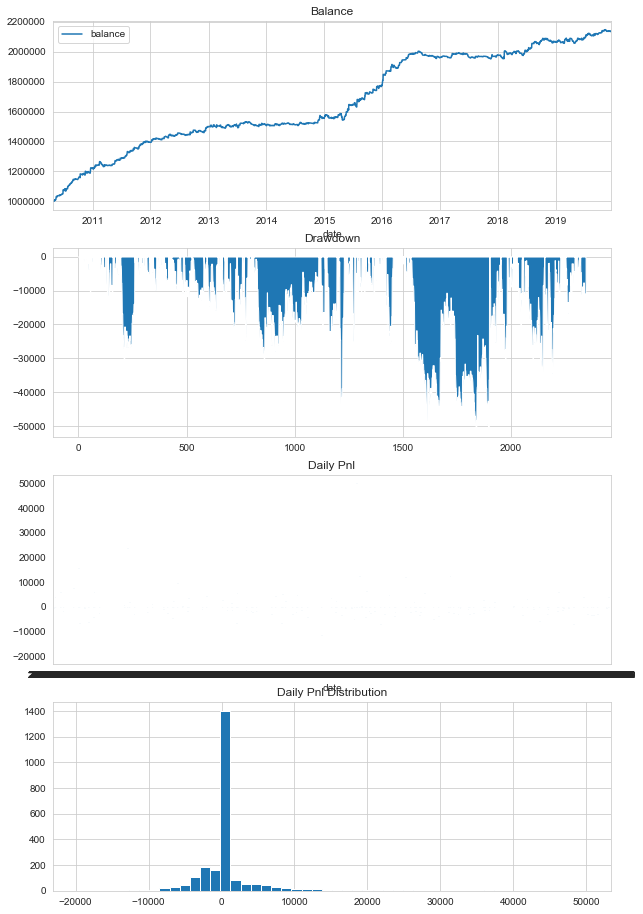

In [4]:
engine.add_strategy(TSMyoPPDCRSIStrategy, {'rsi_len': 10, 'rsi_filter': 20, 'don_len': 30})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
# PPDC_RSI 股指IC
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPPDCRSIStrategy, {})

In [7]:
# 10-20 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
#setting.add_parameter("atr_stop", 3, 6, 1)
#setting.add_parameter("atr_window", 10, 60, 10)
#setting.add_parameter("rsi_len", 5, 20, 5)#5
#setting.add_parameter("rsi_filter", 10, 30, 10)#20
#setting.add_parameter("limited_size", 4, 8, 2)
setting.add_parameter("don_len", 5, 60, 5)

engine.run_optimization(setting)

2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 30}, 目标：1.588588211359058
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 35}, 目标：1.5595525738928138
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 60}, 目标：1.557216939799398
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 55}, 目标：1.4608417795809807
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 50}, 目标：1.460764360108417
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 25}, 目标：1.4552662882071472
2020-03-14 19:53:07.744345	参数：{'rsi_len': 10, 'rsi_filter': 10, 'don_len': 15}, 目标：1.4480587031816237
2020-03-14 19:53:07.744345	参数：{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 45}, 目标：1.446189862178604
2020-03-14 19:53:07.744345	参数：{'rsi_len': 20, 'rsi_filter': 10, 'don_len': 25}, 目标：1.4448889259567386
2020-03-14 19:53:07.744345	参数：{'rsi_len': 20, 'rsi_filter': 10, 'don_len': 20}, 目标：1.43852324

[("{'rsi_len': 5, 'rsi_filter': 20, 'don_len': 30}",
  1.588588211359058,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2019, 12, 31),
   'total_days': 1146,
   'profit_days': 268,
   'loss_days': 269,
   'capital': 1000000,
   'end_balance': 2204743.023999995,
   'max_drawdown': -90081.46719999937,
   'max_ddpercent': -7.6922043290102105,
   'max_drawdown_duration': 22,
   'total_net_pnl': 1204743.023999996,
   'daily_net_pnl': 1051.2591832460698,
   'total_commission': 73256.976,
   'daily_commission': 63.92406282722513,
   'total_slippage': 81360.0,
   'daily_slippage': 70.99476439790575,
   'total_turnover': 2441899200.0,
   'daily_turnover': 2130802.0942408377,
   'total_trade_count': 2034,
   'daily_trade_count': 1.774869109947644,
   'total_return': 120.4743023999995,
   'annual_return': 25.230220397905654,
   'daily_return': 0.06807379279530658,
   'return_std': 0.5013229783501284,
   'sharpe_ratio': 1.588588211359058,
   'return_drawdown_ratio': 15.

2020-03-14 19:56:31.710532	开始加载历史数据
2020-03-14 19:56:31.710532	加载进度： [1%]
2020-03-14 19:56:31.710532	加载进度： [2%]
2020-03-14 19:56:31.710532	加载进度： [2%]
2020-03-14 19:56:31.710532	加载进度： [3%]
2020-03-14 19:56:31.710532	加载进度： [4%]
2020-03-14 19:56:31.710532	加载进度： [5%]
2020-03-14 19:56:31.710532	加载进度： [6%]
2020-03-14 19:56:31.710532	加载进度： [7%]
2020-03-14 19:56:31.710532	加载进度： [7%]
2020-03-14 19:56:31.710532	加载进度： [8%]
2020-03-14 19:56:31.710532	加载进度： [9%]
2020-03-14 19:56:31.710532	加载进度： [10%]
2020-03-14 19:56:31.711532	加载进度：# [11%]
2020-03-14 19:56:31.711532	加载进度：# [12%]
2020-03-14 19:56:31.711532	加载进度：# [12%]
2020-03-14 19:56:31.711532	加载进度：# [13%]
2020-03-14 19:56:31.711532	加载进度：# [14%]
2020-03-14 19:56:31.711532	加载进度：# [15%]
2020-03-14 19:56:31.711532	加载进度：# [16%]
2020-03-14 19:56:31.711532	加载进度：# [16%]
2020-03-14 19:56:31.711532	加载进度：# [17%]
2020-03-14 19:56:31.711532	加载进度：# [18%]
2020-03-14 19:56:31.711532	加载进度：# [19%]
2020-03-14 19:56:31.711532	加载进度：# [20%]
2020-03-14 19:56:31.711532	

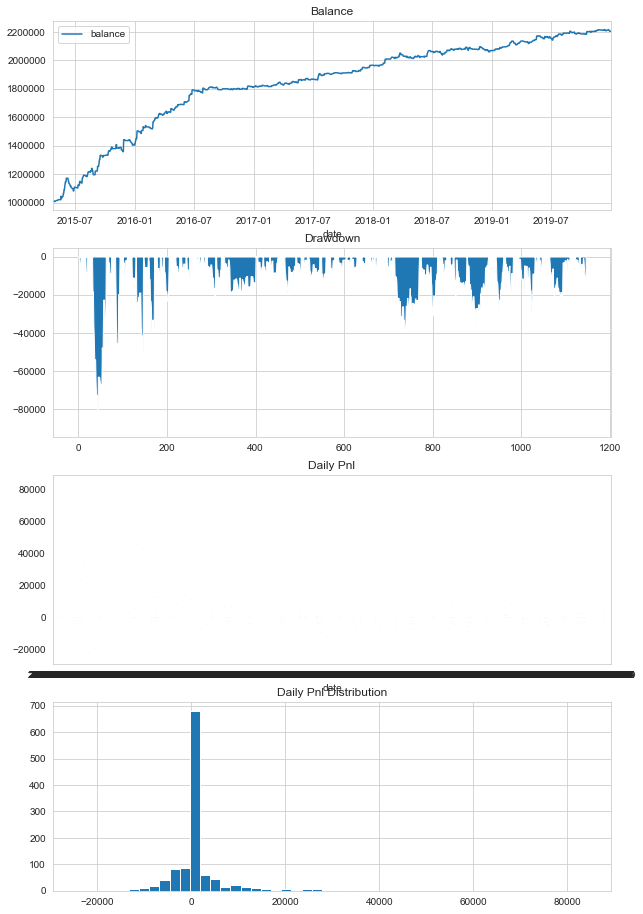

In [8]:
engine.add_strategy(TSMyoPPDCRSIStrategy, {'rsi_len': 5, 'rsi_filter': 20, 'don_len': 30})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()